# Lab 2: Data Preparation


Hi all 

Feedback is highly welcomed

1.  description of how you intend to fill-in missing values, encode and scale data, and treat outliers (max 250 words)_._

1.  Missing Values:

**For numericals** only age has missing values.   I filled it with the median

**For the categorical values**,  Job and education , when both are missing I droped the rows. Then I mapped the education to the majority of the job in the same category.

_poutcome_ is 22.7 very close to 25% . dropping it wont be worng . but there is a relationship between outcome and Previous 0 and pdays -1.  but i will be in favour of dropping it .

2.  Encoding

**Categorical Ordinals:** _education_ convert to a number scale using a scale mapper.  for month could be use as cyclical data 1-12

3.  Scaling

Outliers can significantly affect statistics such as mean and standard deviation. Therefore, I want to avoid using the standard scaling when the input has outliers. I used robust scaling instead. It uses median and interquartile range (IQR) to scale input values.Therefore,for features with outliers `age`,`balance`, `duration`, `campaign`, `pdays`,`previous`  I will use  Robuscaling. While for features with no outliers, I used StandardScaling `day`,  `education` , `sin_month` , `cos_month`

4.  Outliers 
I decided to drop all outliers to avoid overfitting the data. 

2.  description of any features you have created or intend to create and why (max 250 words).

I don`t  see  numerical attributes that are fit for a feature transformation to address a mising field indicator. 

**For the categoricals,**  _housing_ and _loan_ could be combined , not sure if that would work. However, I did not do it due to the different impact for each of them on the subscription rate.

% Total subscribed customers: 50% 

% Total subscribed customers with loan: 2.15% 

% Total subscribed customers with housing: 10.15% 

% Total subscribed customers with loan & housing: 0.85% 

======================================================================== 

% Total subscribed customers without loan: 47.85% 

% Total subscribed customers without housing: 8.95% 

% Total subscribed customers without loan & housing: 38.55%



## A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 
# Ignore warnings from Seaborn
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

df = pd.read_csv("./bank.csv")
df.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

## B. Check for missing values.

In [2]:
# missing values per feature
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [3]:
# total missing values
df.isna().sum().sum()

771

Before we start transforming the dataset let's make a copy of it.

In [4]:
df_original = df.copy()

Now let's display the data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


Missing Numerical data

In [8]:
df.select_dtypes(include='number').isna().sum()/df.shape[0]*100

age         0.6
balance     0.0
day         0.0
duration    0.0
campaign    0.0
pdays       0.0
previous    0.0
dtype: float64

Missing Categorical data

In [9]:
df.select_dtypes(include=['object']).isna().sum()/df.shape[0]*100

job            0.50
marital        0.00
education      5.20
default        0.00
housing        0.00
loan           0.00
contact        9.55
month          0.00
poutcome      22.70
subscribed     0.00
dtype: float64

Display missing data in %

In [10]:
percent_missing = df.isnull().sum() * 100 / df.shape[0]

missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)

missing_value_df[missing_value_df['percent_missing'] > 0 ]


column_name  percent_missing
job               job             0.50
age               age             0.60
education   education             5.20
contact       contact             9.55
poutcome     poutcome            22.70

None of the values have reached **25% missing**. `poutcome` is the highest with **22.7%** almost **23%**, Close enough.

Missing values

Numerical 
`age` 

Categorical 

`job`
`education`
`contact`
`poutcome`

## C. Treatment of Missing Values in Numerical Columns

Note that missing values may not always be NaNs. For instance, if `Loan_Amount_Term` had zeros, would they make sense or should they be considered missing? That is, we need to understand the dataset well in order to identify which values are missing.

Note also that no column has more than 25% missing values. Thus, we do not need to consider dropping whole columns.

Display values that are NaN

In [11]:
df[df['age'].isna()]


age            job  marital  education default  balance housing loan  \
456   NaN  self-employed  married   tertiary      no      917      no   no   
472   NaN    blue-collar  married    primary      no      474     yes  yes   
526   NaN       services  married  secondary      no     2478     yes   no   
595   NaN     management  married   tertiary      no     1857      no   no   
597   NaN  self-employed  married  secondary     yes      254     yes  yes   
601   NaN         admin.   single  secondary      no      111     yes   no   
605   NaN     management  married   tertiary      no     1330     yes   no   
744   NaN     management  married   tertiary      no      -61      no   no   
795   NaN     technician   single   tertiary      no      992     yes   no   
1171  NaN        retired  married   tertiary      no     2812      no   no   
1232  NaN        student   single  secondary      no      431      no   no   
1408  NaN  self-employed   single   tertiary      no      251      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
456    cellular    6   feb       518         3    212         5  failure   
472   telephone    9   feb       152         3    221         1  failure   
526    cellular   28   jan       347         1    230         1  failure   
595    cellular   29   jan       386         1    168         4  failure   
597    cellular   29   jan       194         1    188         1  failure   
601    cellular   29   jan        55         1    195         3  failure   
605    cellular   29   jan        41         2    261         1  failure   
744    cellular   30   jan        90         5    172         1  failure   
795    cellular    4   may       301         1     88         2  success   
1171   cellular    3   aug       392         4    181         3  success   
1232   cellular   19   aug       418        11    185         5  success   
1408   cellular   12   jul       537         1     -1         0      NaN   

     subscribed  
456          no  
472          no  
526          no  
595          no  
597          no  
601          no  
605          no  
744          no  
795          no  
1171        yes  
1232        yes  
1408        yes

Make sure the match the missing values calculate in the previoous section 

In [12]:
(df['age'].isna()).sum()


12

find statsistics of age value

In [13]:
df['age'].describe()

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

distribution of age

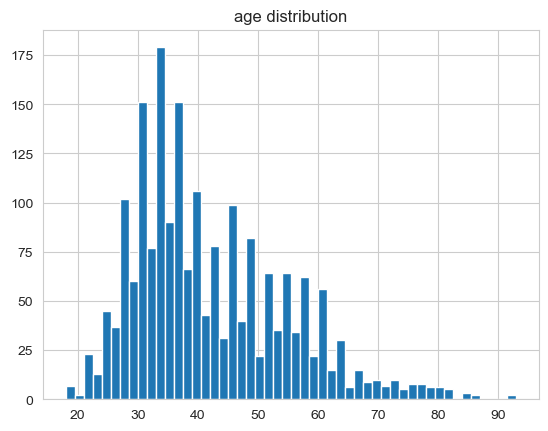

In [14]:
df_original.hist(column='age',bins=50)
plt.title("age distribution")
plt.show()

In [15]:
df_original[df_original['age'] == 38]

age          job  marital  education default  balance housing loan  \
10    38.0   management   single        NaN      no      715     yes   no   
15    38.0  blue-collar  married        NaN      no        0     yes   no   
26    38.0   technician  married  secondary      no     -421     yes   no   
33    38.0   technician  married  secondary      no      275     yes   no   
79    38.0     services  married  secondary      no     5000      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
1832  38.0   management  married   tertiary      no      536     yes   no   
1880  38.0   management  married   tertiary      no     1477      no   no   
1892  38.0   management  married   tertiary      no      630      no   no   
1921  38.0       admin.  married  secondary      no        0     yes   no   
1962  38.0     services  married  secondary      no     2678      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
10    cellular    2   apr       951         1    132         3  failure   
15    cellular    2   apr       477         2    267         1  failure   
26    cellular    3   apr       187         1    332         5  failure   
33    cellular    3   apr       277         2    333         1  failure   
79    cellular    4   dec       720         5    536         5  failure   
...        ...  ...   ...       ...       ...    ...       ...      ...   
1832  cellular   22   oct       234         1     92         1  success   
1880  cellular   15   sep       385         3    769         2  failure   
1892  cellular    2   sep       362         1    388         3    other   
1921  cellular    8   sep       210         1     92         3  success   
1962  cellular   28   sep       282         2    187         1  success   

     subscribed  
10           no  
15           no  
26           no  
33           no  
79           no  
...         ...  
1832        yes  
1880        yes  
1892        yes  
1921        yes  
1962        yes  

[66 rows x 17 columns]

### Impute Missing Values

Replacing the missing values by the `50% percentile` or the `median` as the distribution shows that most of the contacts fall between `30-40`. While the `mean value` is higher than the peak of the distribution `41.75` ~ 42 yrs 

In [18]:
df['age'].fillna(df['age'].median(), inplace=True)


In [19]:
# checking if values were filled 
(df['age'].isna()).sum()

0

In [20]:
df[df['age'] == 38]

age          job  marital  education default  balance housing loan  \
10    38.0   management   single        NaN      no      715     yes   no   
15    38.0  blue-collar  married        NaN      no        0     yes   no   
26    38.0   technician  married  secondary      no     -421     yes   no   
33    38.0   technician  married  secondary      no      275     yes   no   
79    38.0     services  married  secondary      no     5000      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
1832  38.0   management  married   tertiary      no      536     yes   no   
1880  38.0   management  married   tertiary      no     1477      no   no   
1892  38.0   management  married   tertiary      no      630      no   no   
1921  38.0       admin.  married  secondary      no        0     yes   no   
1962  38.0     services  married  secondary      no     2678      no   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
10    cellular    2   apr       951         1    132         3  failure   
15    cellular    2   apr       477         2    267         1  failure   
26    cellular    3   apr       187         1    332         5  failure   
33    cellular    3   apr       277         2    333         1  failure   
79    cellular    4   dec       720         5    536         5  failure   
...        ...  ...   ...       ...       ...    ...       ...      ...   
1832  cellular   22   oct       234         1     92         1  success   
1880  cellular   15   sep       385         3    769         2  failure   
1892  cellular    2   sep       362         1    388         3    other   
1921  cellular    8   sep       210         1     92         3  success   
1962  cellular   28   sep       282         2    187         1  success   

     subscribed  
10           no  
15           no  
26           no  
33           no  
79           no  
...         ...  
1832        yes  
1880        yes  
1892        yes  
1921        yes  
1962        yes  

[78 rows x 17 columns]

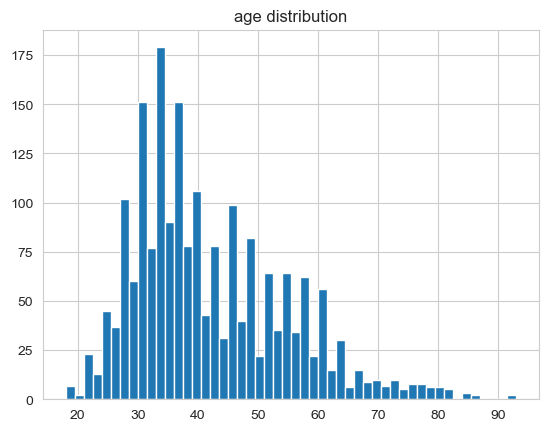

pandas.core.frame.DataFrame

In [21]:
df.hist(column='age',bins=50)
plt.title("age distribution")
plt.show()

type(df)

## D. Treatment of Missing Values in Categorical Columns


In [22]:
df_categorial_missing = df.select_dtypes(include=['object']).isna().sum()/df.shape[0]*100

missing = ('job','education','contact','poutcome')

for col in missing:
    print(col)
    print('=========')
    print("value counts")
    print(df[col].value_counts())
    print("\n")
    print("describe values")
    print('=========')
    print(df[col].describe())
    print('****************************************\n\n')


job
value counts
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64


describe values
count           1990
unique            11
top       management
freq             461
Name: job, dtype: object
****************************************


education
value counts
secondary    995
tertiary     684
primary      217
Name: education, dtype: int64


describe values
count          1896
unique            3
top       secondary
freq            995
Name: education, dtype: object
****************************************


contact
value counts
cellular     1663
telephone     146
Name: contact, dtype: int64


describe values
count         1809
unique           2
top       cellular
freq          1663
Name: contact, dtype: object
****************************************


poutcome
value counts
failure  

In [23]:
df.shape

(2000, 17)

In [24]:
df.isnull().sum().to_frame(name='count').query('count > 0')


count
job           10
education    104
contact      191
poutcome     454

In [25]:
df.isnull().sum().to_frame(name='percentage').query('percentage > 0')*100/ df.shape[0]

#df.isnull().sum().to_frame(name='counts').query('counts > 0')


percentage
job              0.50
education        5.20
contact          9.55
poutcome        22.70

In [26]:
df[df['job'].isna() & df['education']]

age  job  marital  education default  balance housing loan   contact  \
255   42.0  NaN   single    primary      no     2398     yes   no  cellular   
831   41.0  NaN   single    primary      no     2398     yes   no       NaN   
1223  55.0  NaN  married  secondary      no     2206      no   no  cellular   
1669  54.0  NaN  married  secondary      no     2206      no   no  cellular   
1975  45.0  NaN  married   tertiary      no      406      no   no  cellular   

      day month  duration  campaign  pdays  previous poutcome subscribed  
255     3   feb       144         2    271         2  failure         no  
831     8   may       287         2     -1         0      NaN         no  
1223   12   aug       265         1     91         5  success        yes  
1669   13   may       260         1     91         4  success        yes  
1975    7   sep       314         1     -1         0      NaN        yes

In [32]:
#df_job_ed = df[df['job'].notna() & df['education'].isna()]


df_ed = df[['job','education']]

de2 = df_ed[df_ed['job'].notna() & df_ed['education'].isna()]

In [33]:
de2['job'].value_counts()


management       23
technician       20
student          17
blue-collar      10
retired          10
admin.            8
services          7
self-employed     2
entrepreneur      1
unemployed        1
Name: job, dtype: int64

In [34]:
de2['job'].value_counts().sum()


99

In [35]:
df.groupby(["job","education"]).count() 

age  marital  default  balance  housing  loan  \
job           education                                                  
admin.        primary     10       10       10       10       10    10   
              secondary  194      194      194      194      194   194   
              tertiary    35       35       35       35       35    35   
blue-collar   primary     93       93       93       93       93    93   
              secondary  185      185      185      185      185   185   
              tertiary    10       10       10       10       10    10   
entrepreneur  primary      4        4        4        4        4     4   
              secondary   18       18       18       18       18    18   
              tertiary    22       22       22       22       22    22   
housemaid     primary     16       16       16       16       16    16   
              secondary   12       12       12       12       12    12   
              tertiary     7        7        7        7        7     7   
management    primary      9        9        9        9        9     9   
              secondary   38       38       38       38       38    38   
              tertiary   391      391      391      391      391   391   
retired       primary     53       53       53       53       53    53   
              secondary   77       77       77       77       77    77   
              tertiary    22       22       22       22       22    22   
self-employed secondary   15       15       15       15       15    15   
              tertiary    47       47       47       47       47    47   
services      primary     12       12       12       12       12    12   
              secondary  135      135      135      135      135   135   
              tertiary    11       11       11       11       11    11   
student       primary      4        4        4        4        4     4   
              secondary   59       59       59       59       59    59   
              tertiary    16       16       16       16       16    16   
technician    primary      9        9        9        9        9     9   
              secondary  217      217      217      217      217   217   
              tertiary   102      102      102      102      102   102   
unemployed    primary      5        5        5        5        5     5   
              secondary   43       43       43       43       43    43   
              tertiary    20       20       20       20       20    20   

                         contact  day  month  duration  campaign  pdays  \
job           education                                                   
admin.        primary          9   10     10        10        10     10   
              secondary      179  194    194       194       194    194   
              tertiary        33   35     35        35        35     35   
blue-collar   primary         65   93     93        93        93     93   
              secondary      155  185    185       185       185    185   
              tertiary         9   10     10        10        10     10   
entrepreneur  primary          2    4      4         4         4      4   
              secondary       16   18     18        18        18     18   
              tertiary        22   22     22        22        22     22   
housemaid     primary         15   16     16        16        16     16   
              secondary       11   12     12        12        12     12   
              tertiary         6    7      7         7         7      7   
management    primary          8    9      9         9         9      9   
              secondary       37   38     38        38        38     38   
              tertiary       366  391    391       391       391    391   
retired       primary         51   53     53        53        53     53   
              secondary       77   77     77        77        77     77   
              tertiary        21   22     22        22        22     22   
self-emp

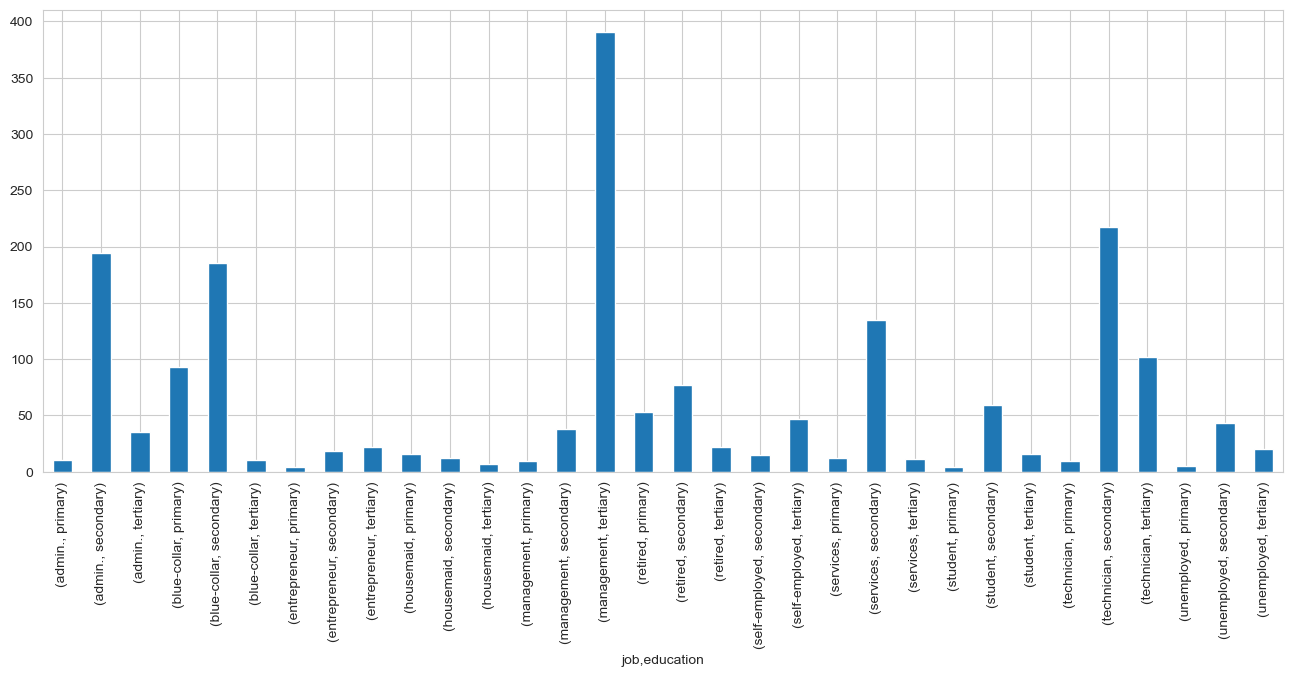

In [31]:
plt.figure(figsize=(16, 6))
df.groupby(by=['job', 'education']).size().plot(kind='bar');

In [36]:
education_mapper = {
    'admin.': 'secondary',
    'management': 'tertiary',
    'services': 'secondary',
    'technician' : 'secondary',
    'student' : 'secondary',
    'entrepreneur' : 'tertiary',
    'unemployed' : 'tertiary',
    'blue-collar' : 'secondary',
    'retired' : 'secondary',
    'self-employed' : 'tertiary'
    
}

df['education'] = df['education'].fillna(df['job'].map(education_mapper))

filled the missing values based on the highest education counts in that job category

In [37]:
df['education'].isnull().sum()

5

In [38]:
df[df['job'].notna() & df['education'].isna()].count()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [39]:
d2 = df[df['job'].notna() & df['education'].isna()]
d2[['job']].value_counts()

Series([], dtype: int64)

In [40]:
df['education'].isnull().value_counts()

False    1995
True        5
Name: education, dtype: int64

In [50]:
# verify 
#d2 = 
df[df['job'].notna() & df['education'].isna()].value_counts().sum()
#d2[['job']]

0

For both `job` and `education` are missing, I will drop these records

In [57]:
indices_to_drop = df[df['education'].isnull() & df['job'].isnull() ].index.values.tolist()

In [58]:
df.drop(indices_to_drop, axis=0, inplace=True)

In [59]:
df['education'].isnull().value_counts()

False    1995
Name: education, dtype: int64

In [60]:
df['contact'].value_counts()

cellular     1850
telephone     145
Name: contact, dtype: int64

Since the majoriy of the contacts is `cellular`, we can fill the missing values with cellulars

In [61]:
df['contact'].fillna('cellular', inplace=True)
df['contact'].isna().sum()

0

In [62]:
df['poutcome'].value_counts() 

failure    952
success    443
other      147
Name: poutcome, dtype: int64

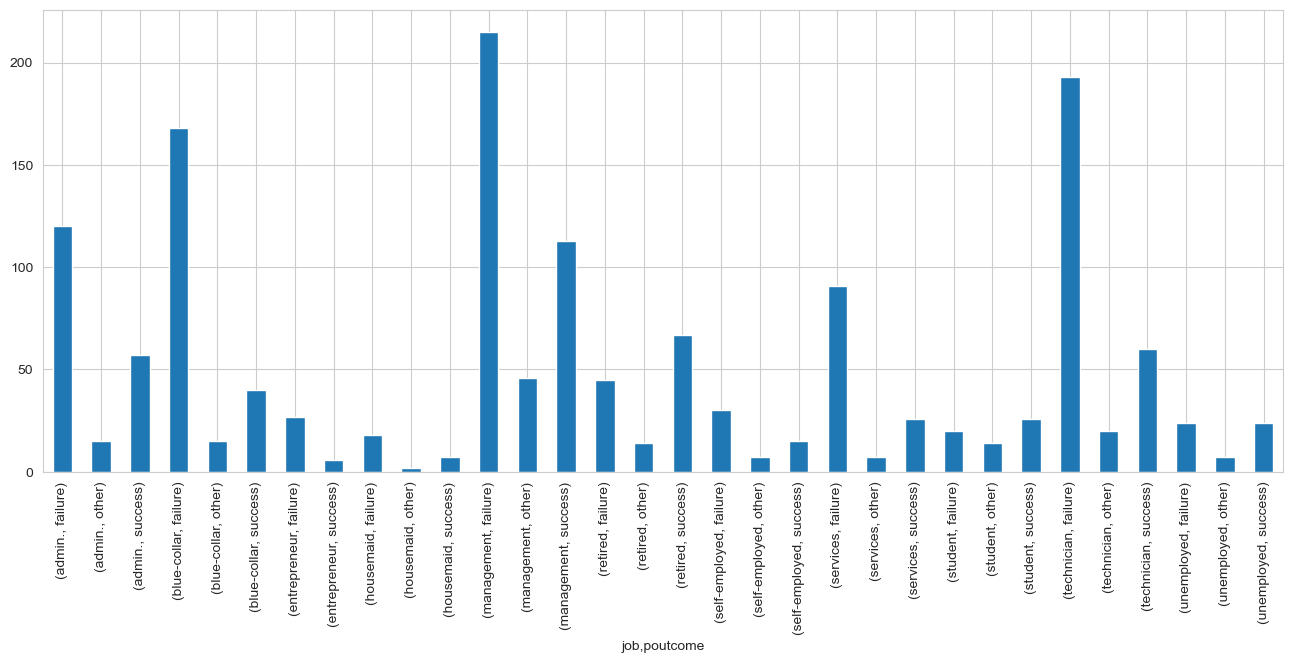

In [63]:
plt.figure(figsize=(16, 6))
df.groupby(by=['job', 'poutcome']).size().plot(kind='bar');

In [64]:
df['job'].value_counts()


management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

`poutcome` is hard to determin based on job category. The spikes that we see is tired to the row count of each contacts in each job category

In [65]:
df.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

job
marital
education
default
housing
loan
contact
month
previous


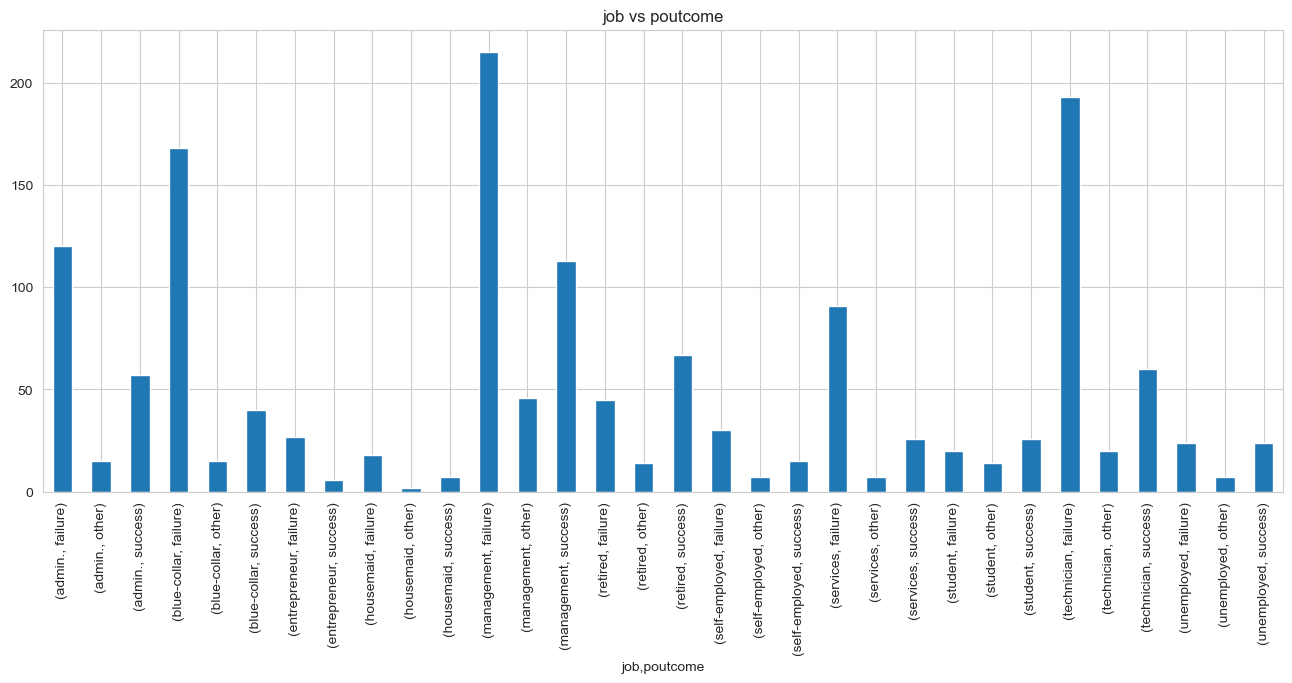

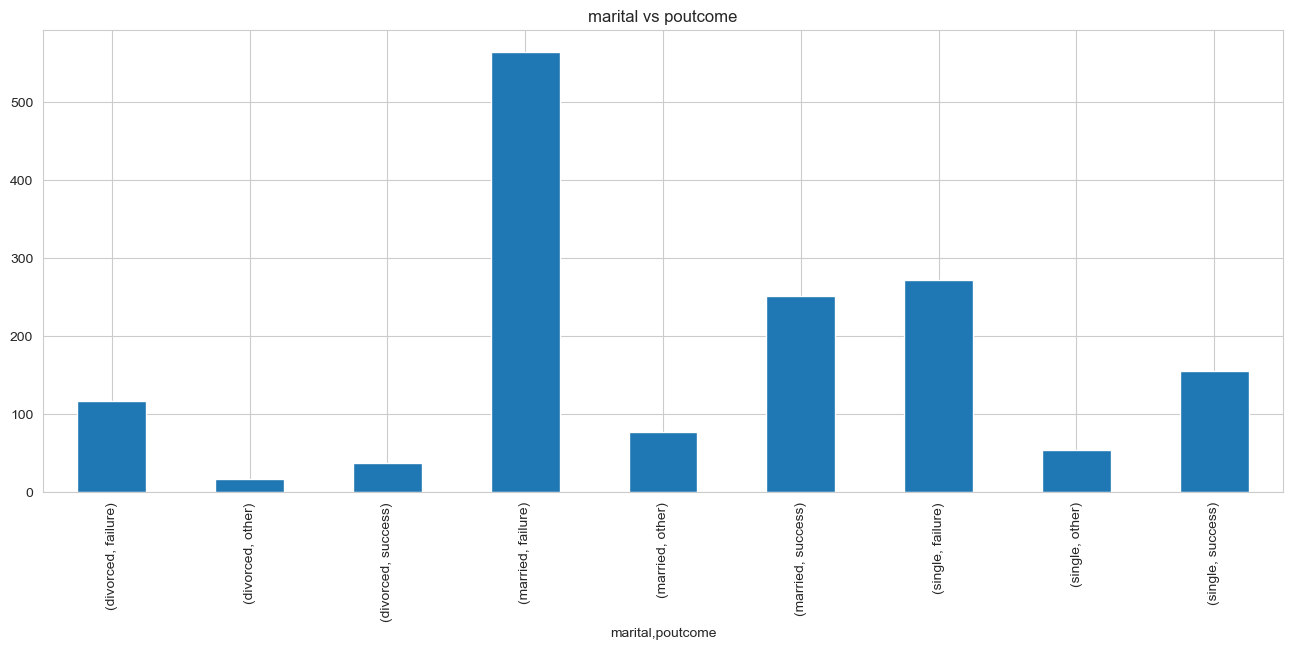

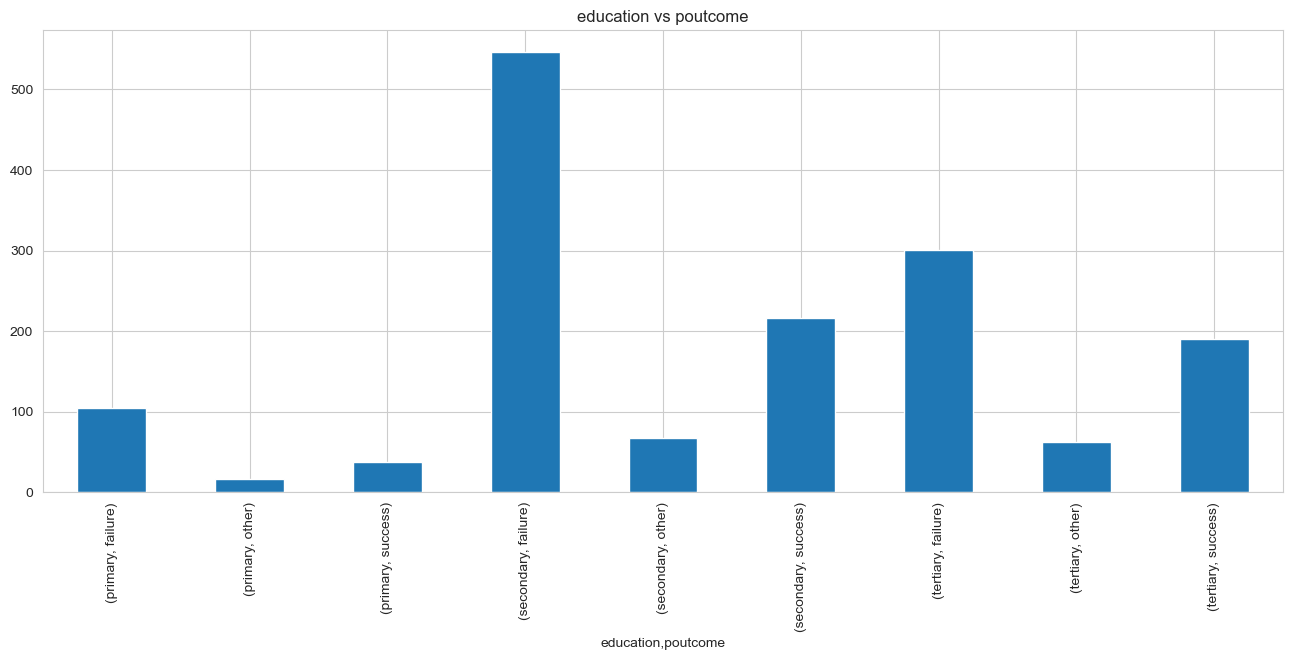

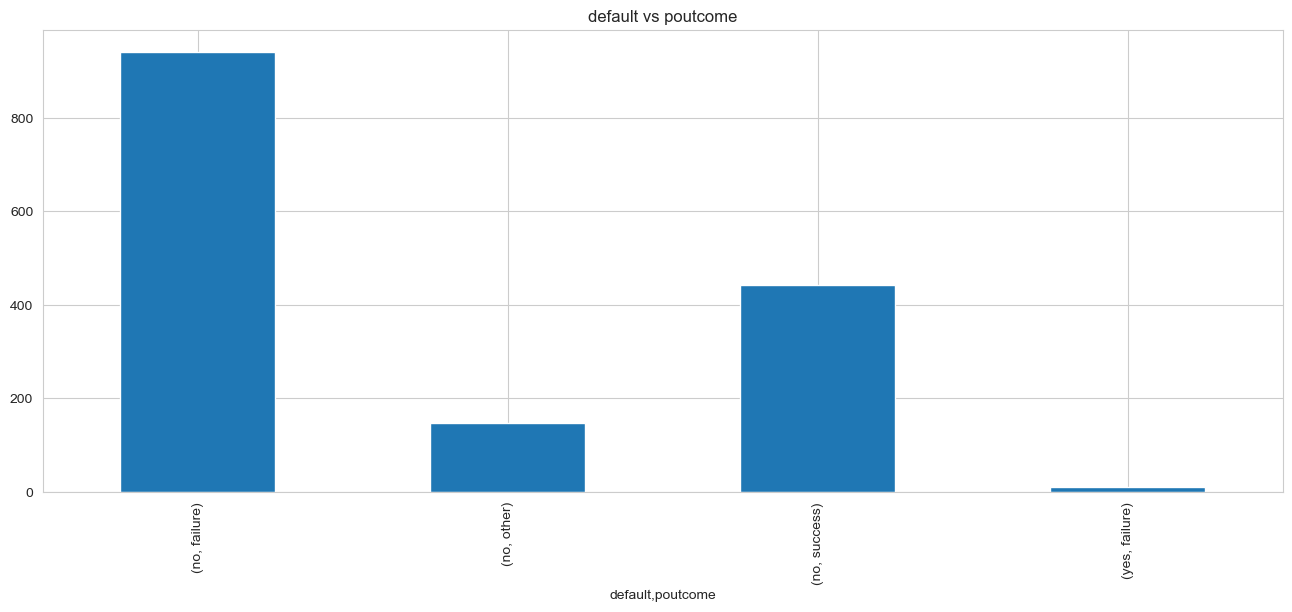

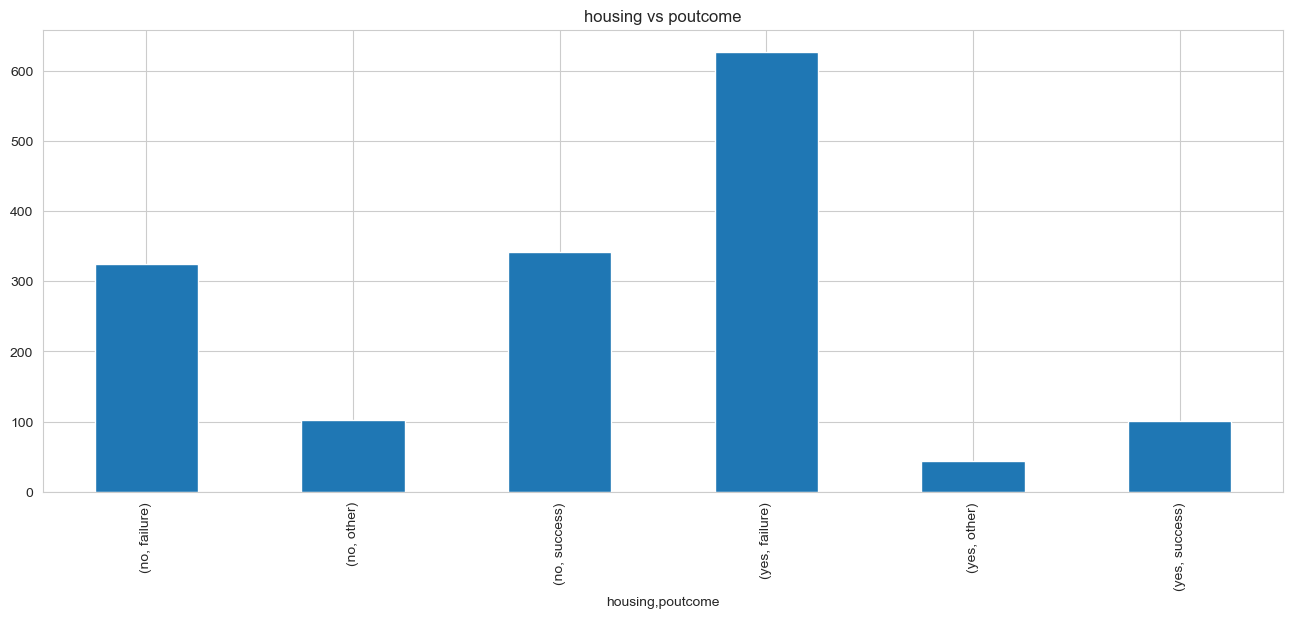

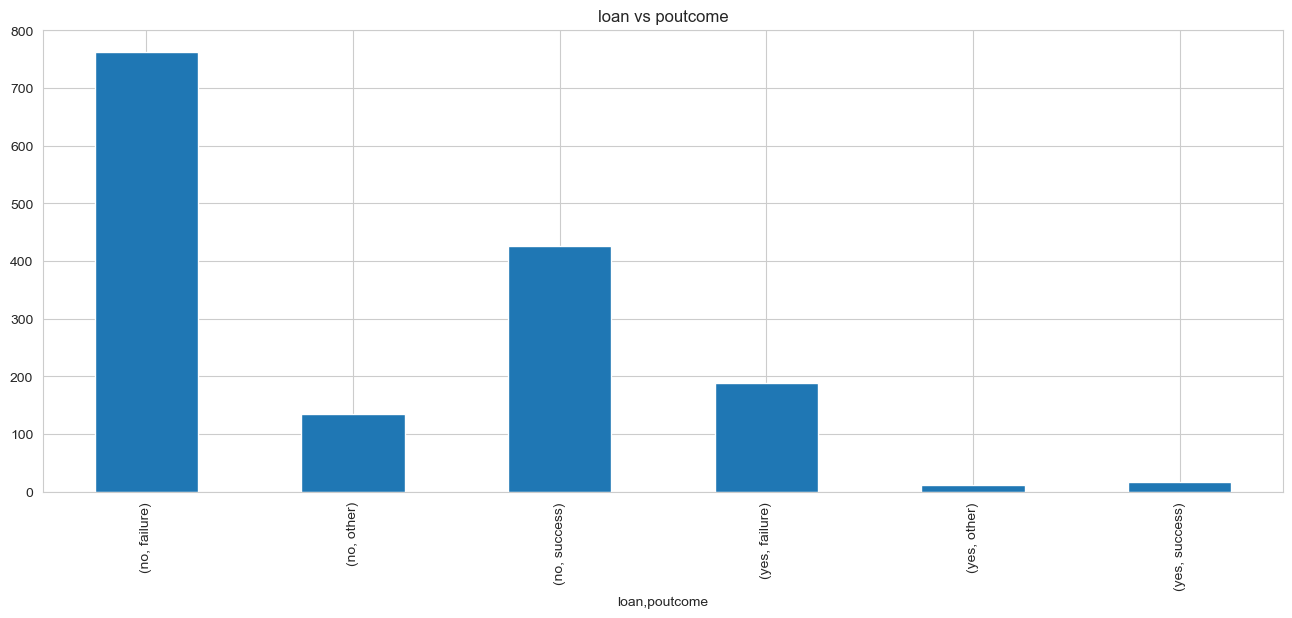

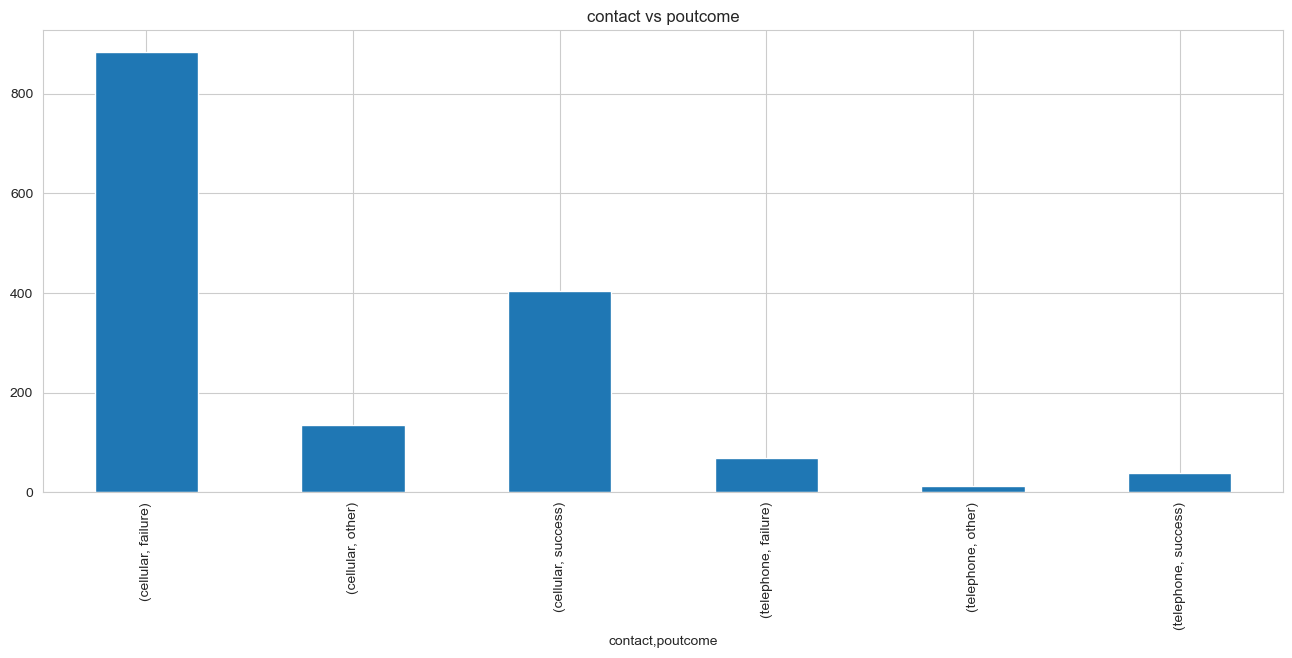

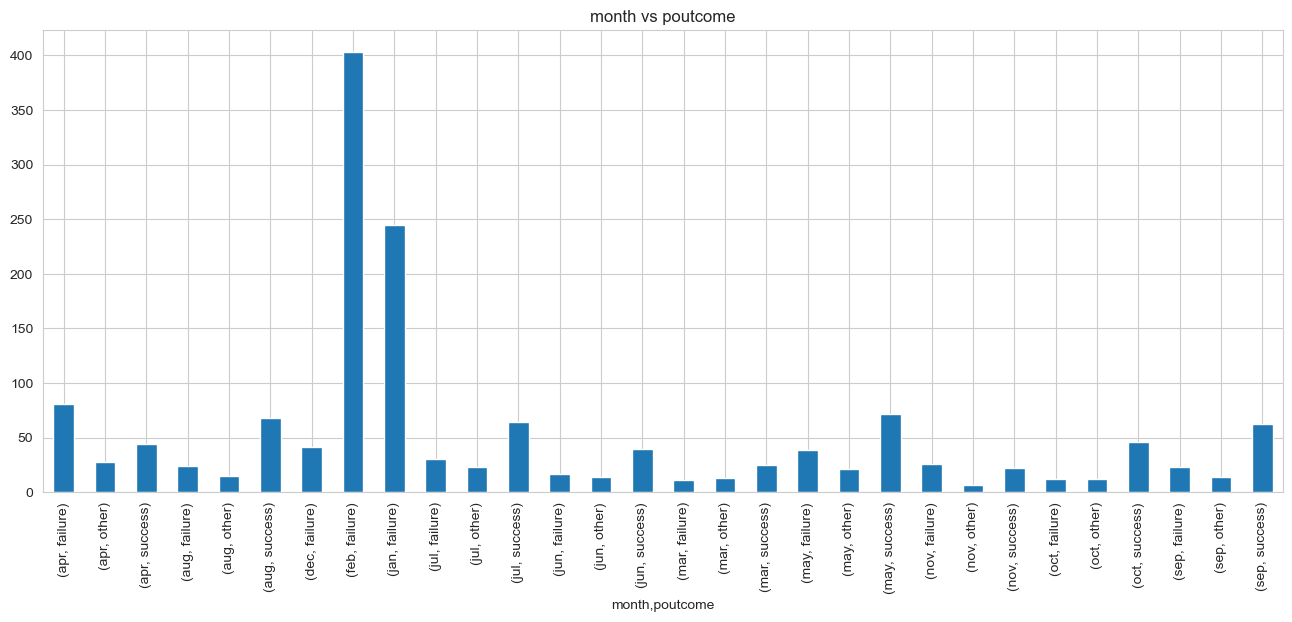

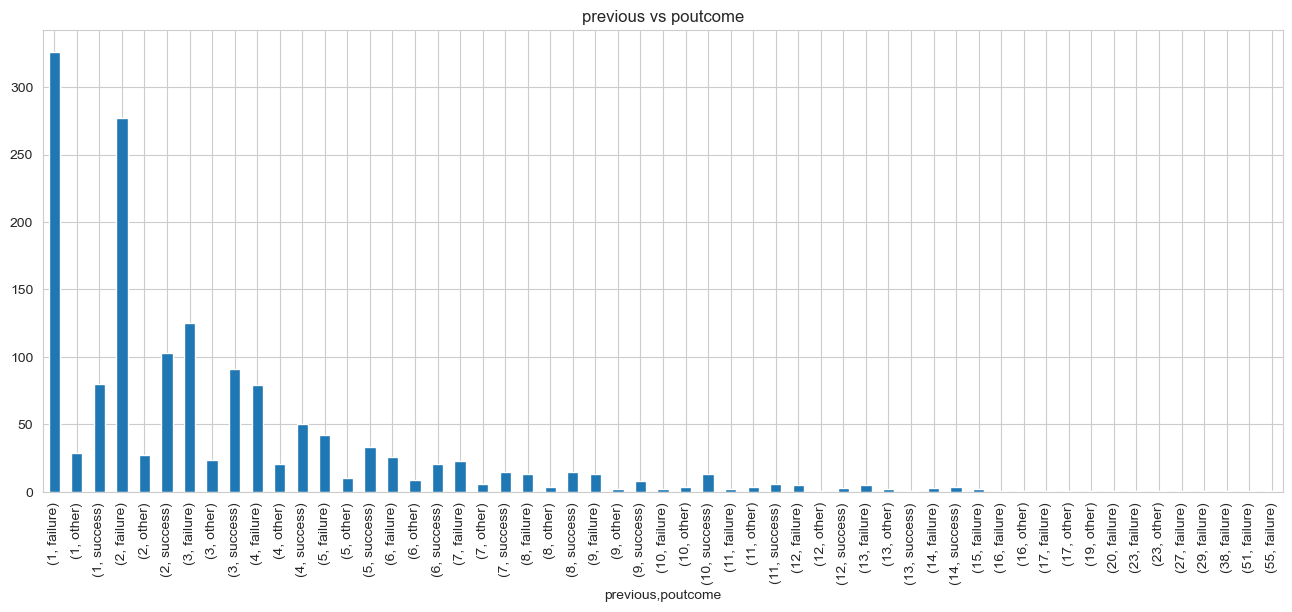

In [66]:
cols = ['job', 'marital', 'education', 'default', 
           'housing', 'loan', 'contact',
           'month', 'previous']

for col in cols:     
    print(col)
    plt.figure(figsize=(16, 6))
    plt.title(f'{col} vs poutcome')
    df.groupby(by=[col, 'poutcome']).size().plot(kind='bar');
    

In [74]:
df3 = df[['month','poutcome']]
df4 = df3[df3['poutcome'].isna()]

df4.groupby(by=['month']).size()

# df[['month','poutcome']].isna().groupby(by=['month']).count()

month
apr     52
aug     29
jul     49
jun     33
mar     21
may    200
nov     13
oct     22
sep     34
dtype: int64

In [75]:
categoriacal_percent_missing = df.select_dtypes(include=['object']).isna().sum()/df.shape[0]*100
categoriacal_percent_missing
prcent_missing = pd.DataFrame({'column_name': categoriacal_percent_missing.keys(),
                                 'percent_missing': categoriacal_percent_missing})

prcent_missing['percent_missing']

# missing_value_df.sort_values('percent_missing', inplace=True)

# missing_value_df[missing_value_df['percent_missing'] > 0 ]


job            0.250627
marital        0.000000
education      0.000000
default        0.000000
housing        0.000000
loan           0.000000
contact        0.000000
month          0.000000
poutcome      22.706767
subscribed     0.000000
Name: percent_missing, dtype: float64

In [ ]:
#df[df['poutcome'].isnull()].count()

In [76]:
df[df['poutcome'].isnull()].groupby(['pdays']).count()

age  job  marital  education  default  balance  housing  loan  contact  \
pdays                                                                           
-1     453  451      453        453      453      453      453   453      453   

       day  month  duration  campaign  previous  poutcome  subscribed  
pdays                                                                  
-1     453    453       453       453       453         0         453

In [77]:
df.groupby(['pdays']).count()

age  job  marital  education  default  balance  housing  loan  contact  \
pdays                                                                           
-1     453  451      453        453      453      453      453   453      453   
 1       7    7        7          7        7        7        7     7        7   
 2       2    2        2          2        2        2        2     2        2   
 4       1    1        1          1        1        1        1     1        1   
 5       1    1        1          1        1        1        1     1        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
 804     1    1        1          1        1        1        1     1        1   
 805     1    1        1          1        1        1        1     1        1   
 828     1    1        1          1        1        1        1     1        1   
 842     1    1        1          1        1        1        1     1        1   
 854     1    1        1          1        1        1        1     1        1   

       day  month  duration  campaign  previous  poutcome  subscribed  
pdays                                                                  
-1     453    453       453       453       453         0         453  
 1       7      7         7         7         7         7           7  
 2       2      2         2         2         2         2           2  
 4       1      1         1         1         1         1           1  
 5       1      1         1         1         1         1           1  
...    ...    ...       ...       ...       ...       ...         ...  
 804     1      1         1         1         1         1           1  
 805     1      1         1         1         1         1           1  
 828     1      1         1         1         1         1           1  
 842     1      1         1         1         1         1           1  
 854     1      1         1         1         1         1           1  

[361 rows x 16 columns]

In [78]:
df[df['poutcome'].isnull()].groupby(['duration']).count()

age  job  marital  education  default  balance  housing  loan  \
duration                                                                  
14          1    1        1          1        1        1        1     1   
20          1    1        1          1        1        1        1     1   
21          1    1        1          1        1        1        1     1   
22          1    1        1          1        1        1        1     1   
23          2    2        2          2        2        2        2     2   
...       ...  ...      ...        ...      ...      ...      ...   ...   
1360        1    1        1          1        1        1        1     1   
1363        1    1        1          1        1        1        1     1   
1407        1    1        1          1        1        1        1     1   
1556        1    1        1          1        1        1        1     1   
1720        1    1        1          1        1        1        1     1   

          contact  day  month  campaign  pdays  previous  poutcome  subscribed  
duration                                                                        
14              1    1      1         1      1         1         0           1  
20              1    1      1         1      1         1         0           1  
21              1    1      1         1      1         1         0           1  
22              1    1      1         1      1         1         0           1  
23              2    2      2         2      2         2         0           2  
...           ...  ...    ...       ...    ...       ...       ...         ...  
1360            1    1      1         1      1         1         0           1  
1363            1    1      1         1      1         1         0           1  
1407            1    1      1         1      1         1         0           1  
1556            1    1      1         1      1         1         0           1  
1720            1    1      1         1      1         1         0           1  

[325 rows x 16 columns]

In [79]:
df[df['poutcome'].isnull()].groupby(['previous']).count()

age  job  marital  education  default  balance  housing  loan  \
previous                                                                  
0         453  451      453        453      453      453      453   453   

          contact  day  month  duration  campaign  pdays  poutcome  subscribed  
previous                                                                        
0             453  453    453       453       453    453         0         453

In [80]:
df[df['poutcome'].notna()].groupby(['previous']).count()

age  job  marital  education  default  balance  housing  loan  \
previous                                                                  
1         435  435      435        435      435      435      435   435   
2         407  406      407        407      407      407      407   407   
3         240  240      240        240      240      240      240   240   
4         150  149      150        150      150      150      150   150   
5          85   84       85         85       85       85       85    85   
6          56   56       56         56       56       56       56    56   
7          44   44       44         44       44       44       44    44   
8          32   32       32         32       32       32       32    32   
9          23   23       23         23       23       23       23    23   
10         19   19       19         19       19       19       19    19   
11         12   12       12         12       12       12       12    12   
12          9    9        9          9        9        9        9     9   
13          8    8        8          8        8        8        8     8   
14          7    7        7          7        7        7        7     7   
15          2    2        2          2        2        2        2     2   
16          2    2        2          2        2        2        2     2   
17          2    2        2          2        2        2        2     2   
19          1    1        1          1        1        1        1     1   
20          1    1        1          1        1        1        1     1   
23          2    2        2          2        2        2        2     2   
27          1    1        1          1        1        1        1     1   
29          1    1        1          1        1        1        1     1   
38          1    1        1          1        1        1        1     1   
51          1    1        1          1        1        1        1     1   
55          1    1        1          1        1        1        1     1   

          contact  day  month  duration  campaign  pdays  poutcome  subscribed  
previous                                                                        
1             435  435    435       435       435    435       435         435  
2             407  407    407       407       407    407       407         407  
3             240  240    240       240       240    240       240         240  
4             150  150    150       150       150    150       150         150  
5              85   85     85        85        85     85        85          85  
6              56   56     56        56        56     56        56          56  
7              44   44     44        44        44     44        44          44  
8              32   32     32        32        32     32        32          32  
9              23   23     23        23        23     23        23          23  
10             19   19     19        19        19     19        19          19  
11             12   12     12        12        12     12        12          12  
12              9    9      9         9         9      9         9           9  
13              8    8      8         8         8      8         8           8  
14              7    7      7         7         7      7         7           7  
15              2    2      2         2         2      2         2           2  
16              2    2      2         2         2      2         2           2  
17              2    2      2         2         2      2         2           2  
19              1    1      1         1         1      1         1           1  
20              1    1      1         1         1      1         1           1  
23              2    2      2         2         2      2         2           2  
27              1    1      1         1         1      1         1           1  
29              1    1      1         1         1      1         1           1  
38              1    1      1         1 

Will delete the poutcome as the missing values is very close to 25% `23%`

In [81]:
missing_poutcome_indxs = df[df['poutcome'].isnull()].index.values.tolist()

df.drop(missing_poutcome_indxs, axis=0, inplace=True)

In [82]:
# confirming deletion
df[df['poutcome'].isnull()].value_counts().sum()

0

## F. Process and Encode the Categorical Features


In [83]:
# Map months to numerical values
month_mapper = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# Replace current month values with numerical mappings
df['month'] = df['month'].replace(month_mapper)

In [84]:
max(df['month'])

12

In [85]:
# Create sin transformation of month values
df['sin_month'] = np.sin(2 * np.pi * df['month'] / max(df['month']))
                         
# Create cos transformation of month values
df['cos_month'] = np.cos(2 * np.pi * df['month'] / max(df['month']))

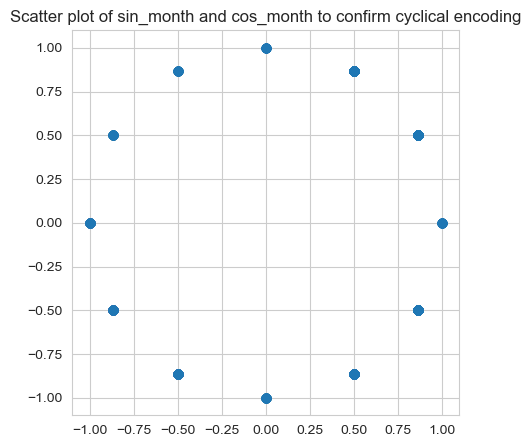

In [86]:
plt.figure(figsize=(5,5))
plt.scatter(df['sin_month'], df['cos_month'])
plt.title('Scatter plot of sin_month and cos_month to confirm cyclical encoding');

In [87]:
# Drop month column in the original dataset to replace with with cyclical transformation of it
df.drop(['month'], axis=1, inplace=True)

In [88]:
 # Create a mapper
education_mapper = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df['education'] = df['education'].replace(education_mapper)
df.head(3)

age         job   marital  education default  balance housing loan  \
0  32.0  technician    single          3      no      392     yes   no   
1  39.0  technician  divorced          2      no      688     yes  yes   
2  59.0     retired   married          2      no     1035     yes  yes   

    contact  day  duration  campaign  pdays  previous poutcome subscribed  \
0  cellular    1       957         2    131         2  failure         no   
1  cellular    1       233         2    133         1  failure         no   
2  cellular    1       126         2    239         1  failure         no   

   sin_month  cos_month  
0   0.866025       -0.5  
1   0.866025       -0.5  
2   0.866025       -0.5

In [89]:
 # subscription bmapper
subscribed_mapper = {
    'no': 0,
    'yes': 1
}

df['subscribed'] = df['subscribed'].replace(subscribed_mapper)
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single          3      no      392     yes   no   
1  39.0   technician  divorced          2      no      688     yes  yes   
2  59.0      retired   married          2      no     1035     yes  yes   
3  47.0  blue-collar   married          2      no      398     yes  yes   
4  54.0      retired   married          2      no     1004     yes   no   

    contact  day  duration  campaign  pdays  previous poutcome  subscribed  \
0  cellular    1       957         2    131         2  failure           0   
1  cellular    1       233         2    133         1  failure           0   
2  cellular    1       126         2    239         1  failure           0   
3  cellular    1       274         1    238         2  failure           0   
4  cellular    1       479         1    307         1  failure           0   

   sin_month  cos_month  
0   0.866025       -0.5  
1   0.866025       -0.5  
2   0.866025       -0.5  
3   0.866025       -0.5  
4   0.866025       -0.5

One-Hot Encode Remaining Categorical Attributes


In [90]:
df = pd.get_dummies(df,
                    columns=['default', 'job', 'marital',
                             'housing', 'loan', 'contact', 'poutcome'], 
                    dummy_na=True, 
                    drop_first=True)

## G. Rescaling Features


Outliers can significantly affect statistics such as mean and standard deviation. Therefore, you may want to avoid using the standard scaling when the input has outliers. We should use robust scaling instead. It uses median and interquartile range (IQR) to scale input values.

In [91]:
df

age  education  balance  day  duration  campaign  pdays  previous  \
0     32.0          3      392    1       957         2    131         2   
1     39.0          2      688    1       233         2    133         1   
2     59.0          2     1035    1       126         2    239         1   
3     47.0          2      398    1       274         1    238         2   
4     54.0          2     1004    1       479         1    307         1   
...    ...        ...      ...  ...       ...       ...    ...       ...   
1961  55.0          2        0   27       262         6    193         4   
1962  38.0          2     2678   28       282         2    187         1   
1963  48.0          3      334   28       600         2     92        12   
1964  61.0          2       11   29       232         1     92         3   
1965  28.0          3      390   29       845         1    232         4   

      subscribed  sin_month  ...  marital_nan  housing_yes  housing_nan  \
0              0   0.866025  ...            0            1            0   
1              0   0.866025  ...            0            1            0   
2              0   0.866025  ...            0            1            0   
3              0   0.866025  ...            0            1            0   
4              0   0.866025  ...            0            1            0   
...          ...        ...  ...          ...          ...          ...   
1961           1  -1.000000  ...            0            0            0   
1962           1  -1.000000  ...            0            0            0   
1963           1  -1.000000  ...            0            1            0   
1964           1  -1.000000  ...            0            0            0   
1965           1  -1.000000  ...            0            0            0   

      loan_yes  loan_nan  contact_telephone  contact_nan  poutcome_other  \
0            0         0                  0            0               0   
1            1         0                  0            0               0   
2            1         0                  0            0               0   
3            1         0                  0            0               0   
4            0         0                  0            0               0   
...        ...       ...                ...          ...             ...   
1961         0         0                  0            0               0   
1962         0         0                  0            0               0   
1963         0         0                  0            0               0   
1964         0         0                  0            0               0   
1965         0         0                  0            0               0   

      poutcome_success  poutcome_nan  
0                    0             0  
1                    0             0  
2                    0             0  
3                    0             0  
4                    0             0  
...                ...           ...  
1961                 1             0  
1962                 1             0  
1963                 1             0  
1964                 1             0  
1965                 1             0  

[1542 rows x 36 columns]

In [92]:
# Numerical features to decide on rescaling
numeric_ftrs = df.select_dtypes(['int64', 'float64']).columns.values
numeric_ftrs = np.delete(numeric_ftrs, np.where(numeric_ftrs == 'subscribed'))
print(numeric_ftrs)

['age' 'education' 'balance' 'day' 'duration' 'campaign' 'pdays'
 'previous' 'sin_month' 'cos_month']


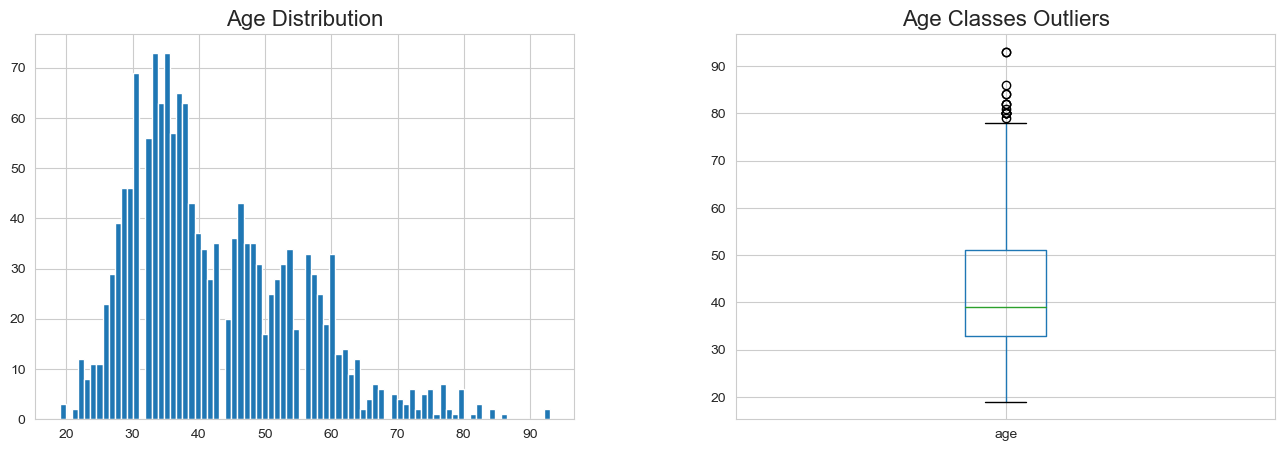

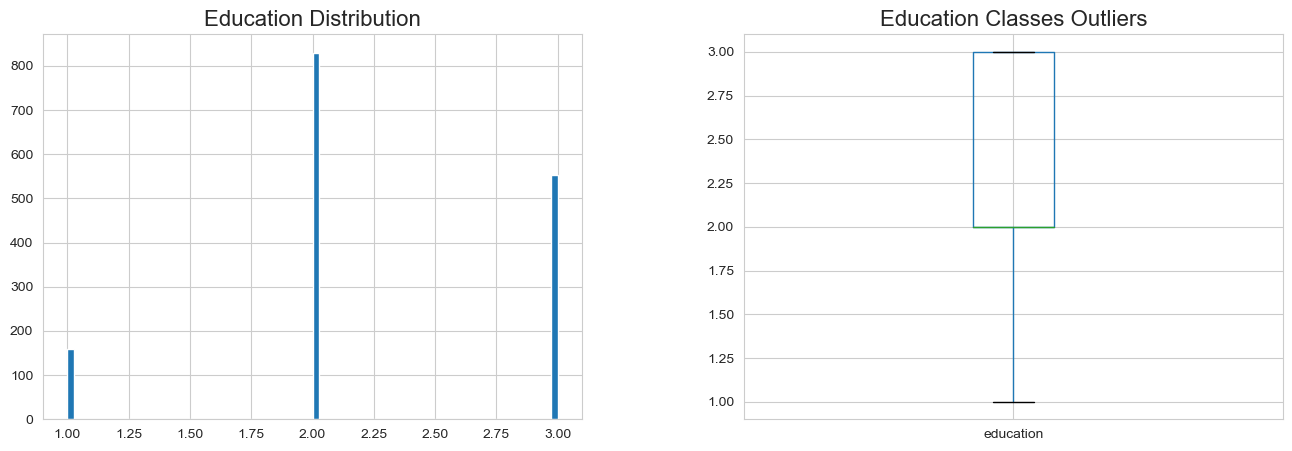

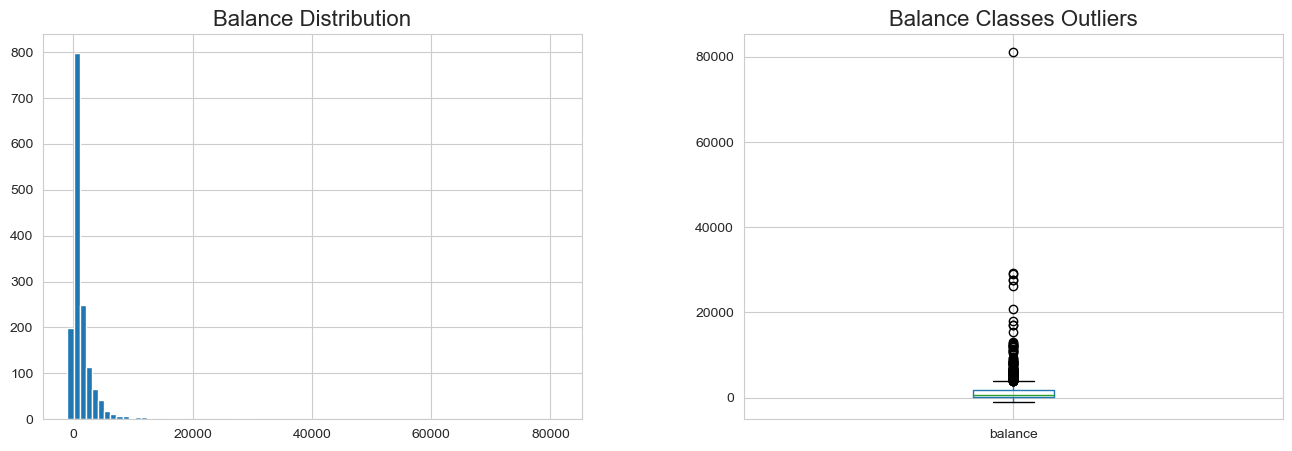

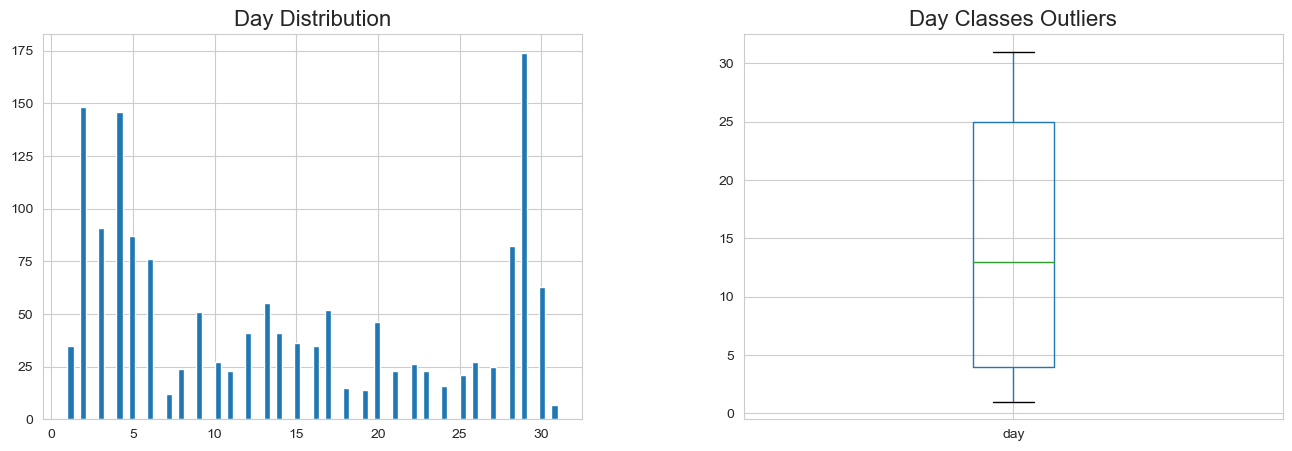

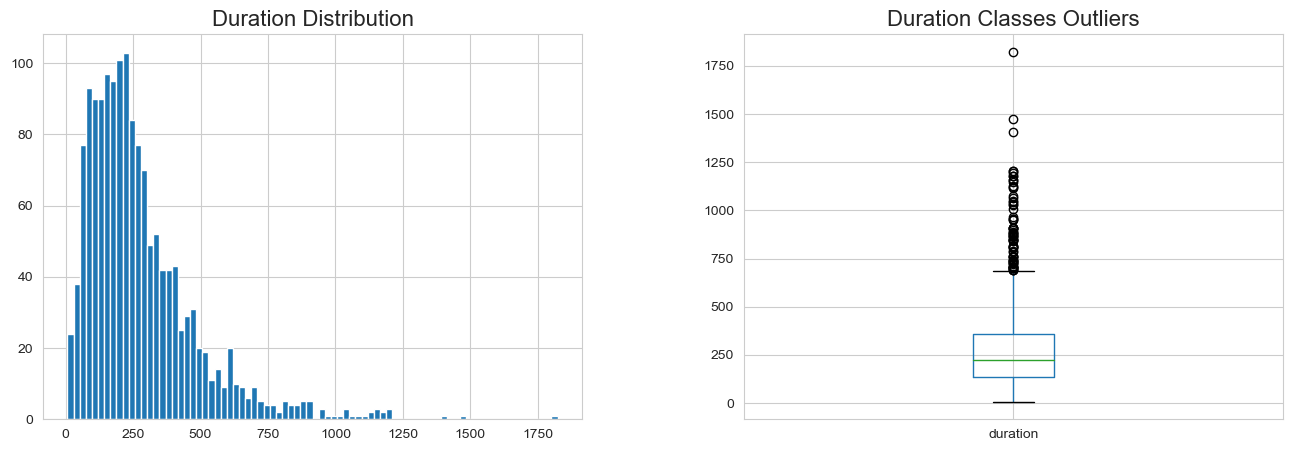

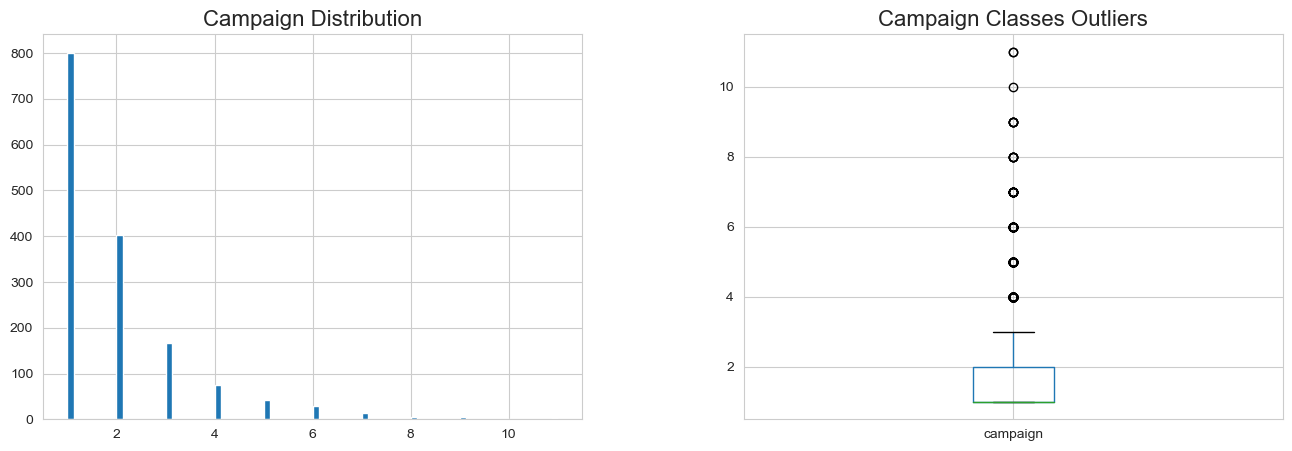

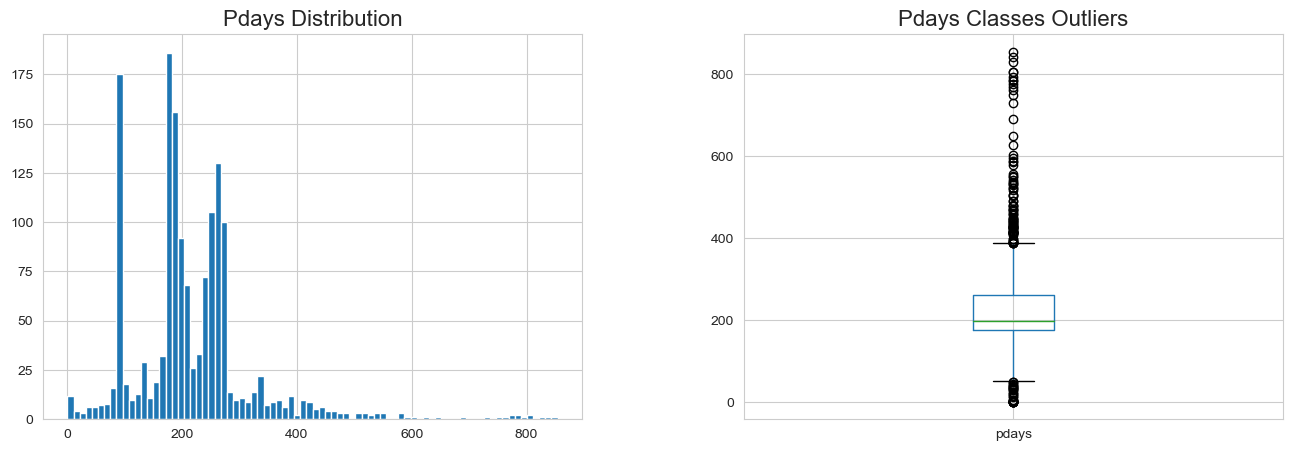

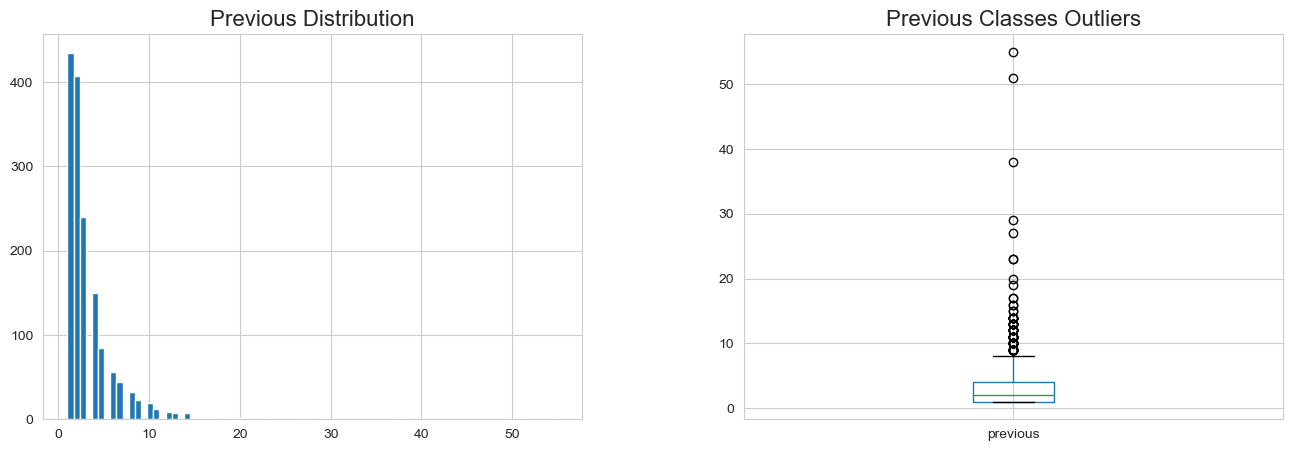

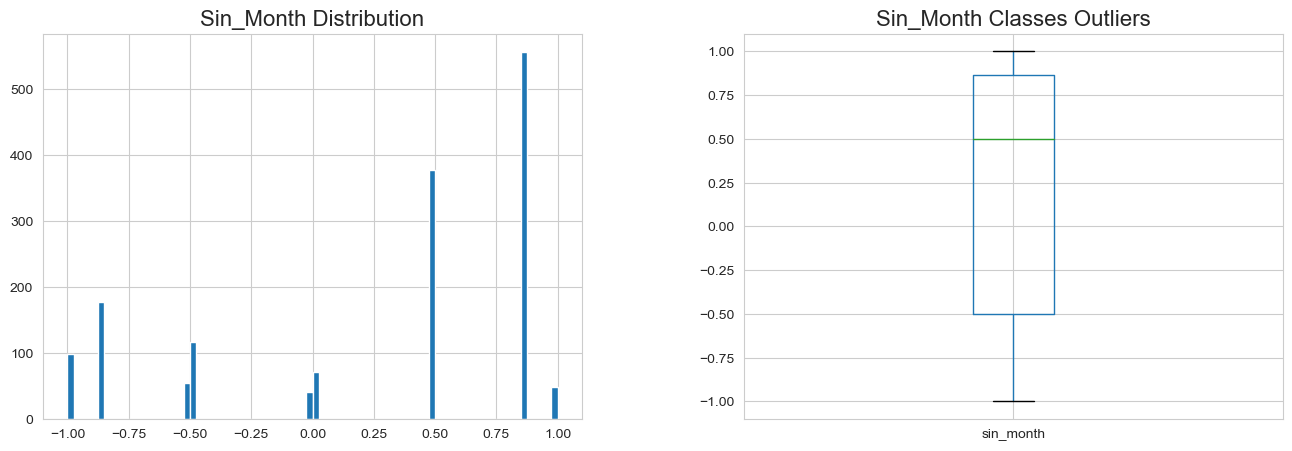

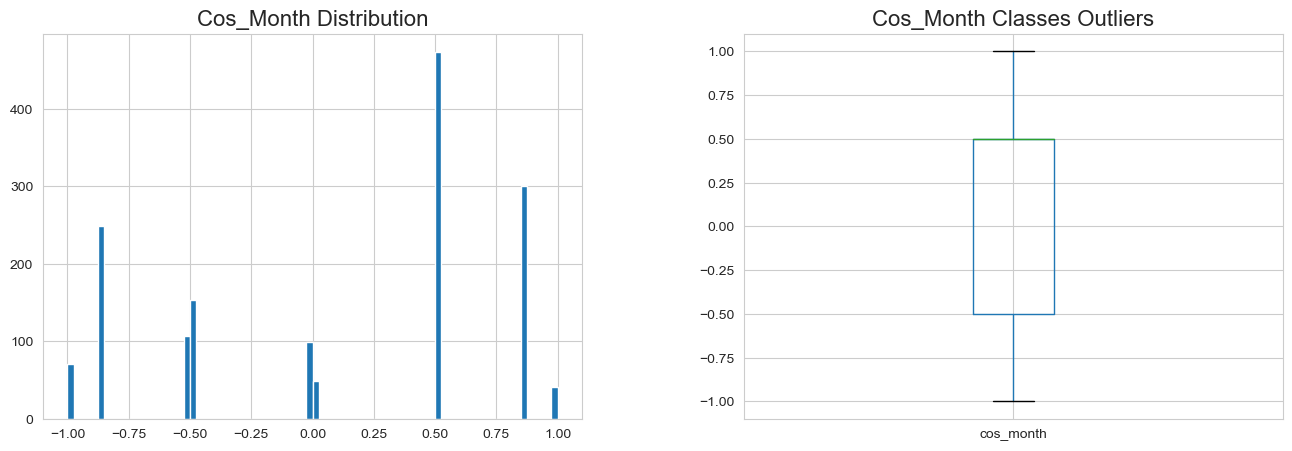

In [93]:
for ftr in numeric_ftrs:
    # Create subplots to plot two plots per row
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (16,5))
    
    # histogram for distributions
    #axs[0].hist(df[ftr], bins=80, edgecolor='black')
    df.hist(column=[ftr],bins=80,ax=axs[0]) 
    axs[0].set_title(ftr.title() + ' Distribution', fontsize=16)
    
    # boxplot to define outliers
    df.boxplot(column=[ftr] , ax=axs[1])
    axs[1].set_title(ftr.title() + ' Classes Outliers', fontsize=16)
    


In [94]:
df['age'].describe()


count    1542.000000
mean       42.423476
std        12.512122
min        19.000000
25%        33.000000
50%        39.000000
75%        51.000000
max        93.000000
Name: age, dtype: float64

To drop outliers, I used the following 

In [95]:
def remove_outlier(df,col_name):
    lower = .05
    upper = .95
    quant_df = df.quantile([lower, upper])
    df = df[(df[col_name] > quant_df.loc[lower, col_name]) & (df[col_name] < quant_df.loc[upper, col_name])]
    return df

In [96]:
for col in numeric_ftrs:
    
    print(col)
    print("============")
    print(df[col].describe())
    df_age = sorted(df[col])
    q1, q3= np.percentile(df_age,[25,75])
    iqr = q3 - q1

    # find lower and upper bound

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    
    print(f'\nlower bound {lower_bound}')
    print(f'upper bound {upper_bound}\n')
    

    remove_outlier(df,col)
          

age
count    1542.000000
mean       42.423476
std        12.512122
min        19.000000
25%        33.000000
50%        39.000000
75%        51.000000
max        93.000000
Name: age, dtype: float64

lower bound 6.0
upper bound 78.0

education
count    1542.000000
mean        2.256809
std         0.629320
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: education, dtype: float64

lower bound 0.5
upper bound 4.5

balance
count     1542.000000
mean      1461.015564
std       3278.263084
min       -980.000000
25%        221.000000
50%        568.000000
75%       1693.000000
max      81204.000000
Name: balance, dtype: float64

lower bound -1987.0
upper bound 3901.0

day
count    1542.000000
mean       14.187419
std        10.235730
min         1.000000
25%         4.000000
50%        13.000000
75%        25.000000
max        31.000000
Name: day, dtype: float64

lower bound -27.5
upper bound 56.5

duration
count    1542.000000
mea

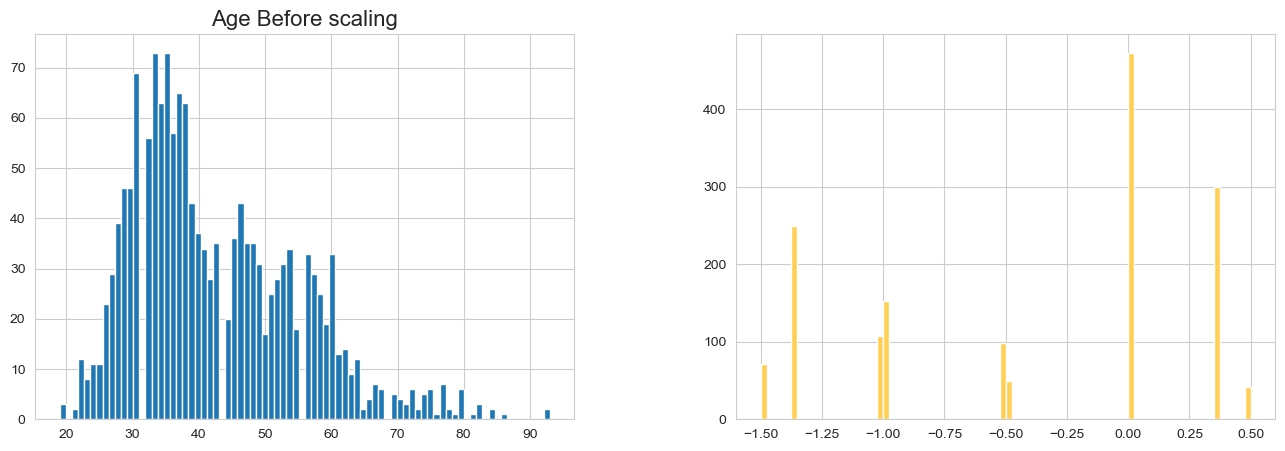

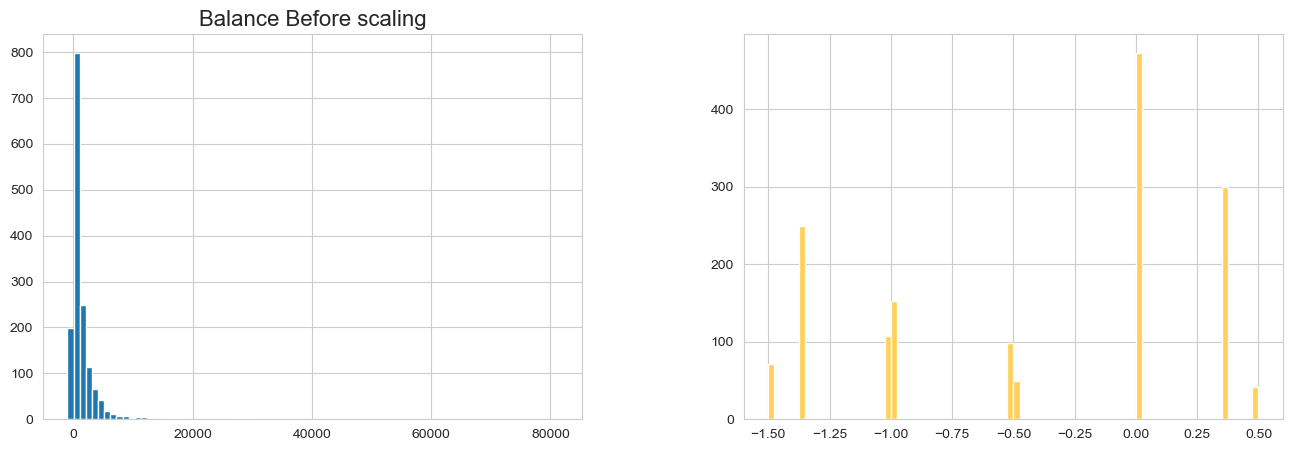

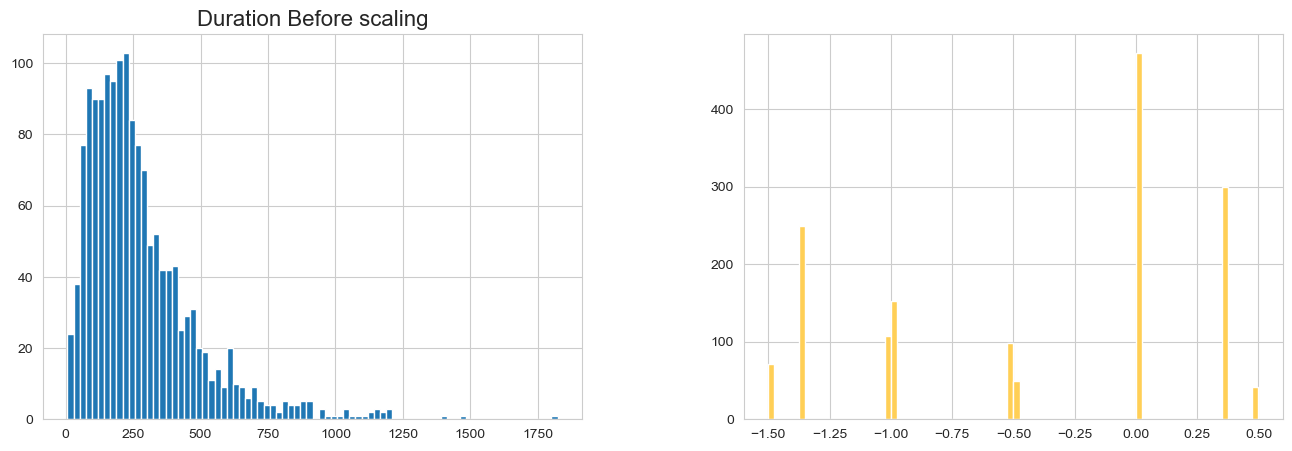

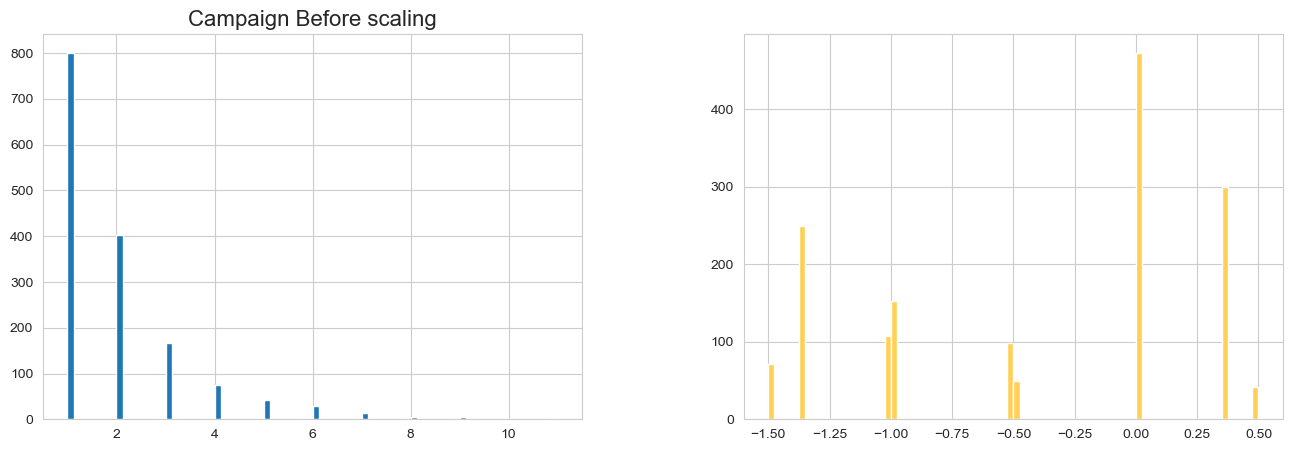

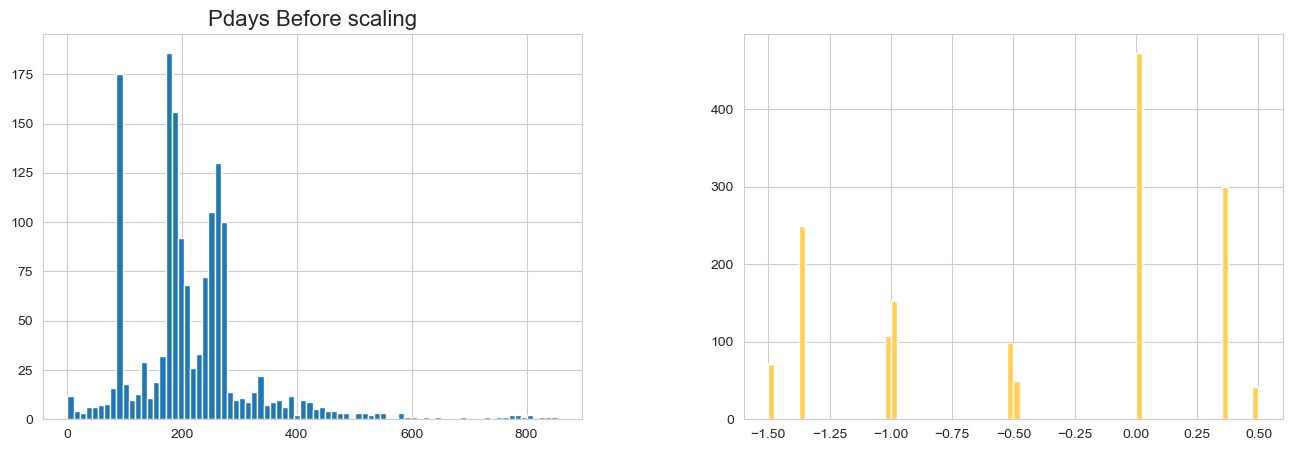

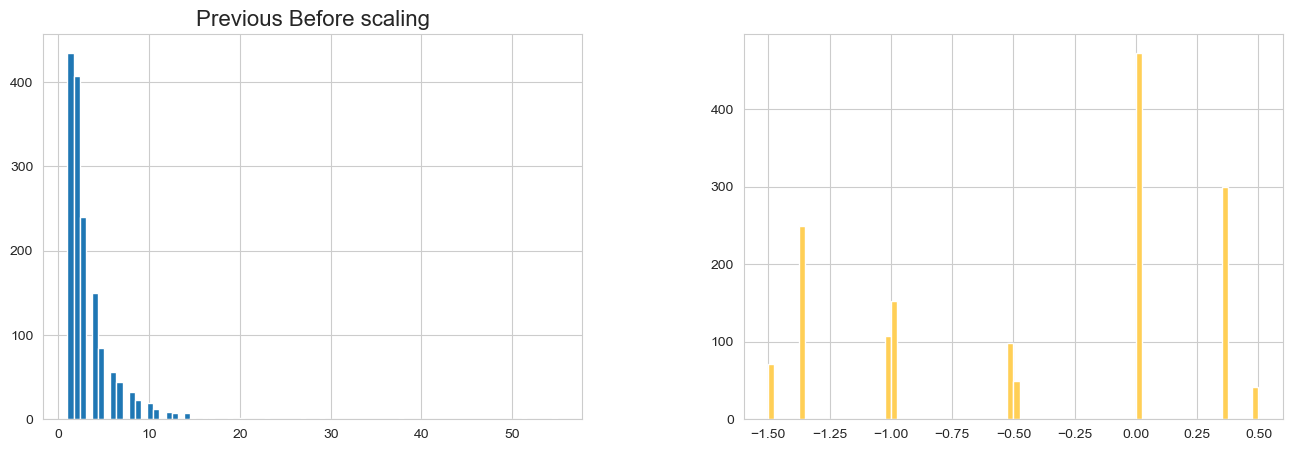

In [97]:
cols_with_ouliers = ['age','balance', 'duration', 'campaign', 'pdays','previous']

for col_o in cols_with_ouliers: 

    # Create subplots to plot two plots per row
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (16,5))

    # histogram for distributions
    #axs[0].hist(df[ftr], bins=80, edgecolor='black')
    df.hist(column=[col_o],bins=80,ax=axs[0]) 
    axs[0].set_title(col_o.title() + ' Before scaling', fontsize=16)

    scaler = RobustScaler()
    df[[col_o]] = scaler.fit_transform(df[[col]])
    df[col_o].hist(bins=80, color='#FFCF56')


    
   
    
# df['age'].hist(bins=80) 
# scaler = RobustScaler()
# df[['age']] = scaler.fit_transform(df[['age']])
# df['age'].hist(bins=80)

### After dropping outliers 

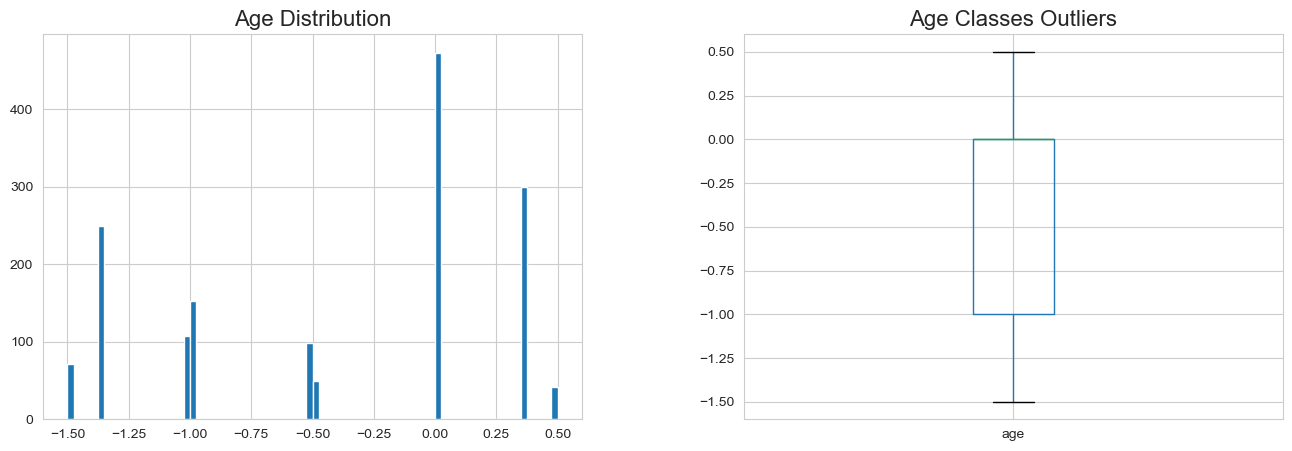

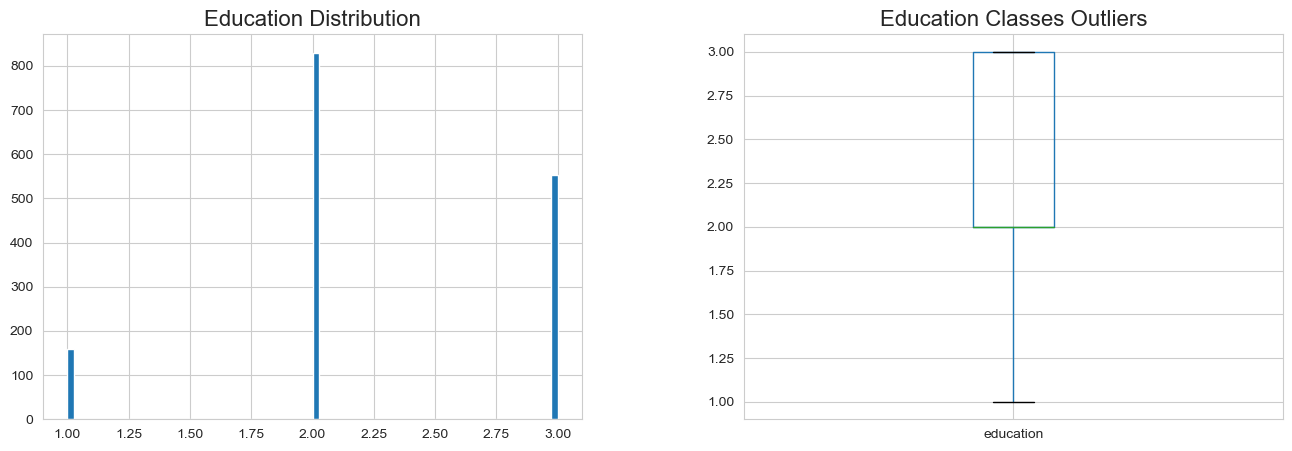

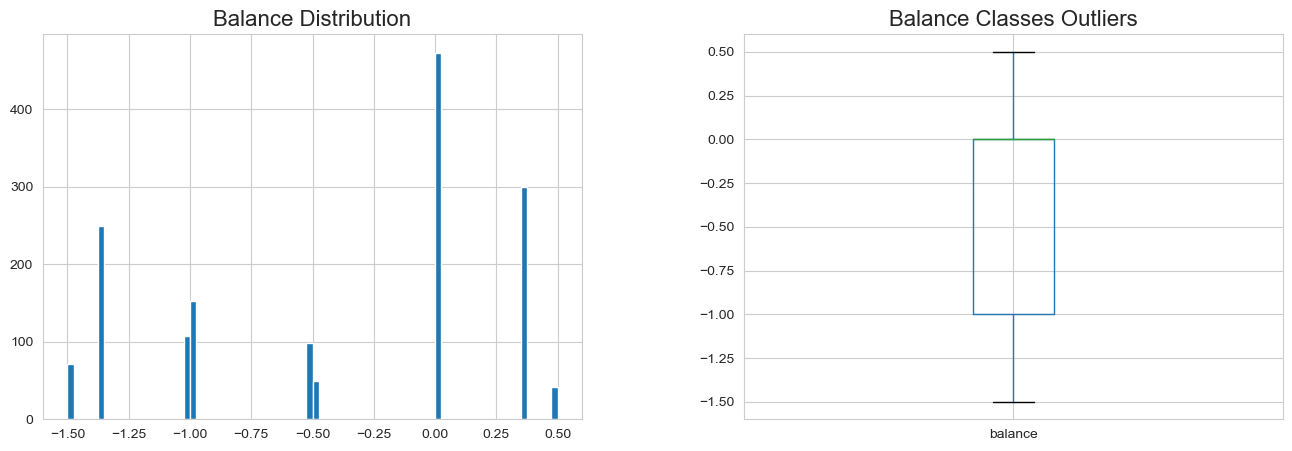

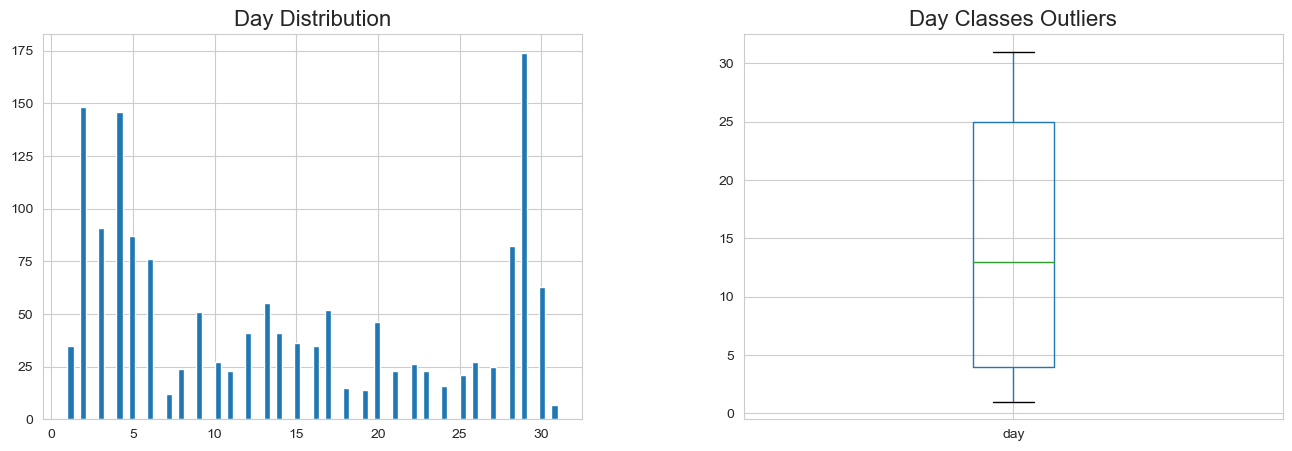

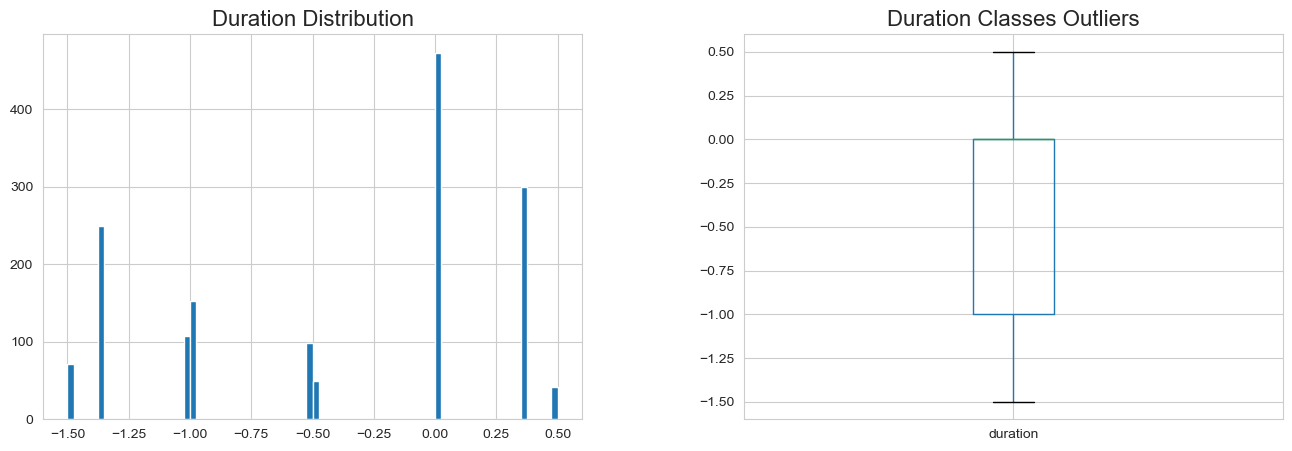

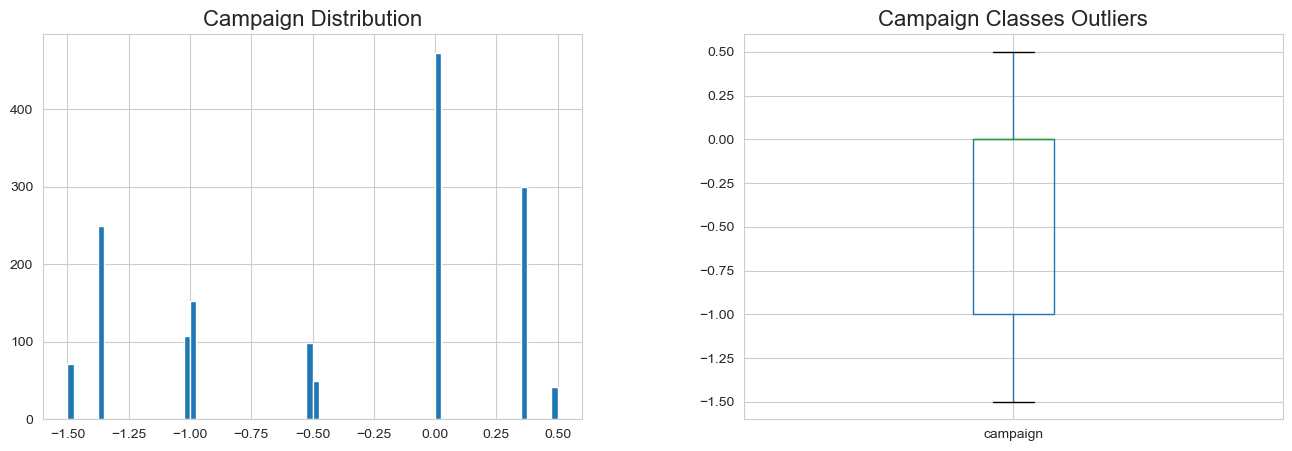

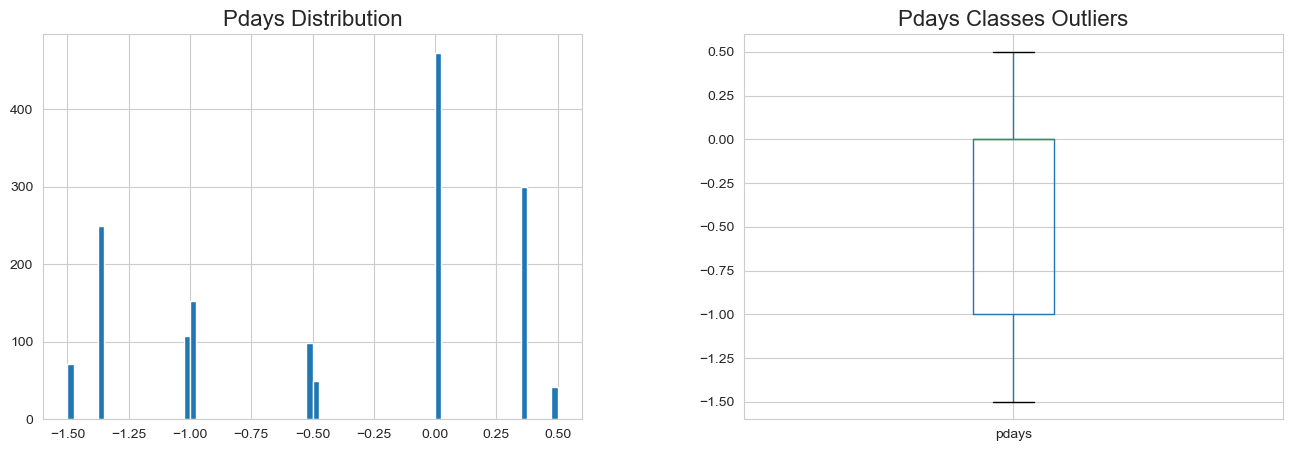

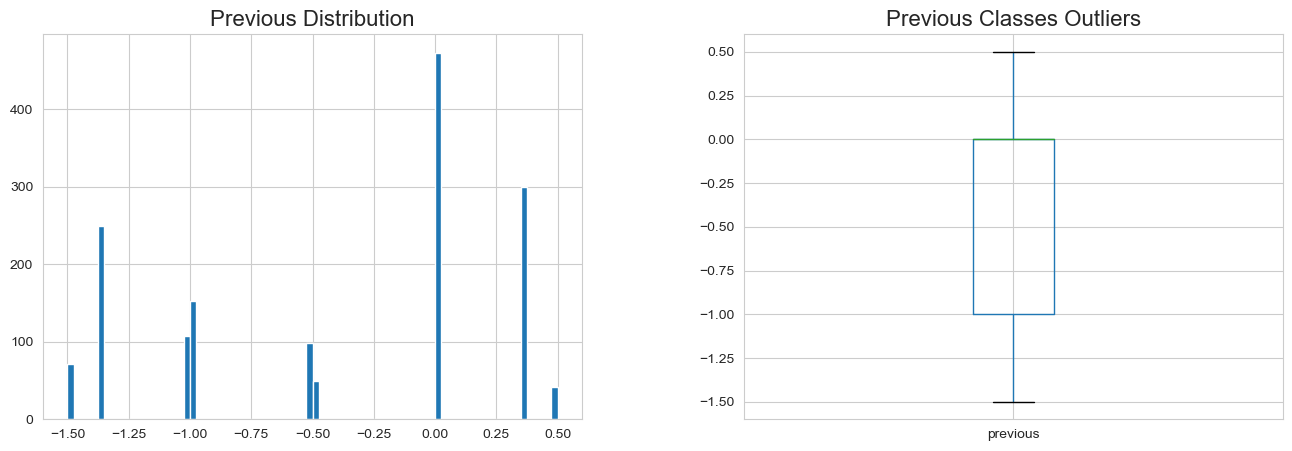

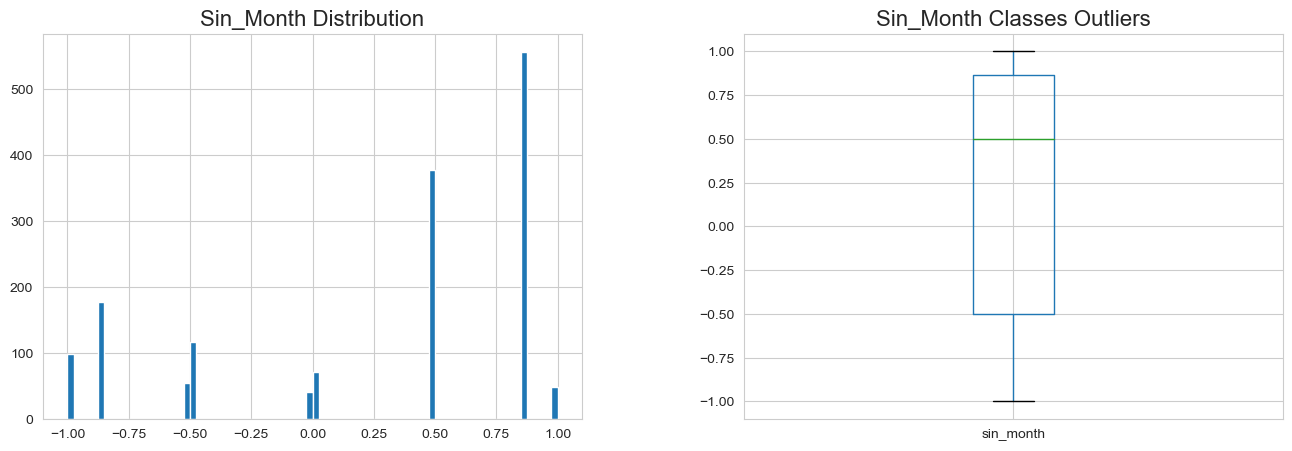

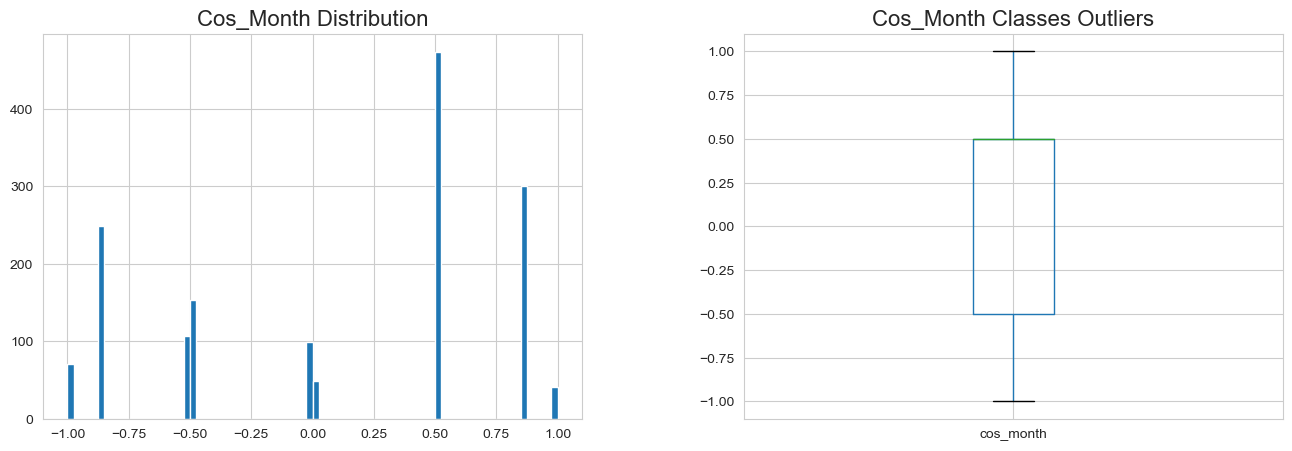

In [98]:
for ftr in numeric_ftrs:
    # Create subplots to plot two plots per row
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (16,5))
    
    # histogram for distributions
    #axs[0].hist(df[ftr], bins=80, edgecolor='black')
    df.hist(column=[ftr],bins=80,ax=axs[0]) 
    axs[0].set_title(ftr.title() + ' Distribution', fontsize=16)
    
    # boxplot to define outliers
    df.boxplot(column=[ftr] , ax=axs[1])
    axs[1].set_title(ftr.title() + ' Classes Outliers', fontsize=16)
    


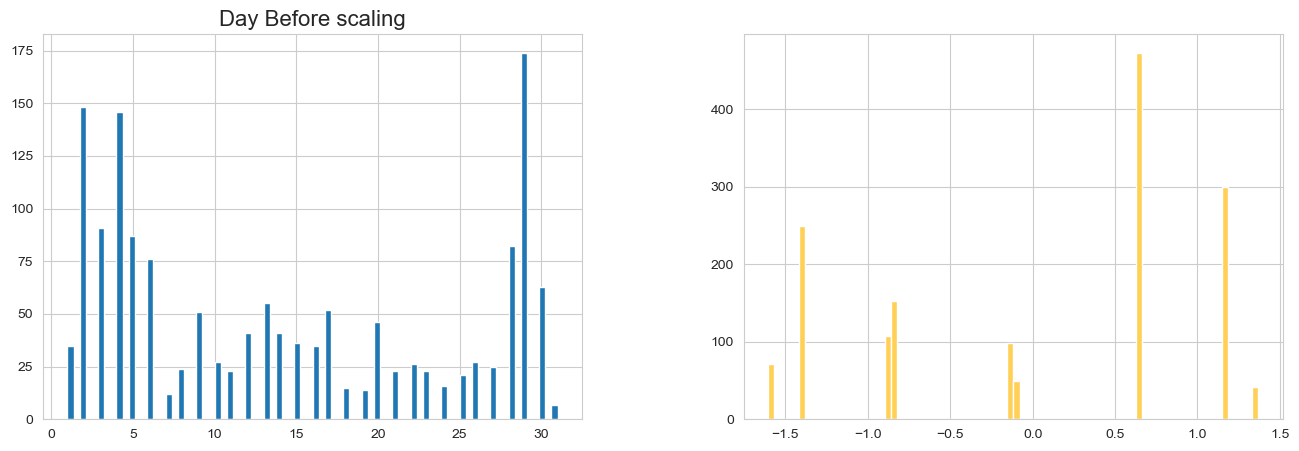

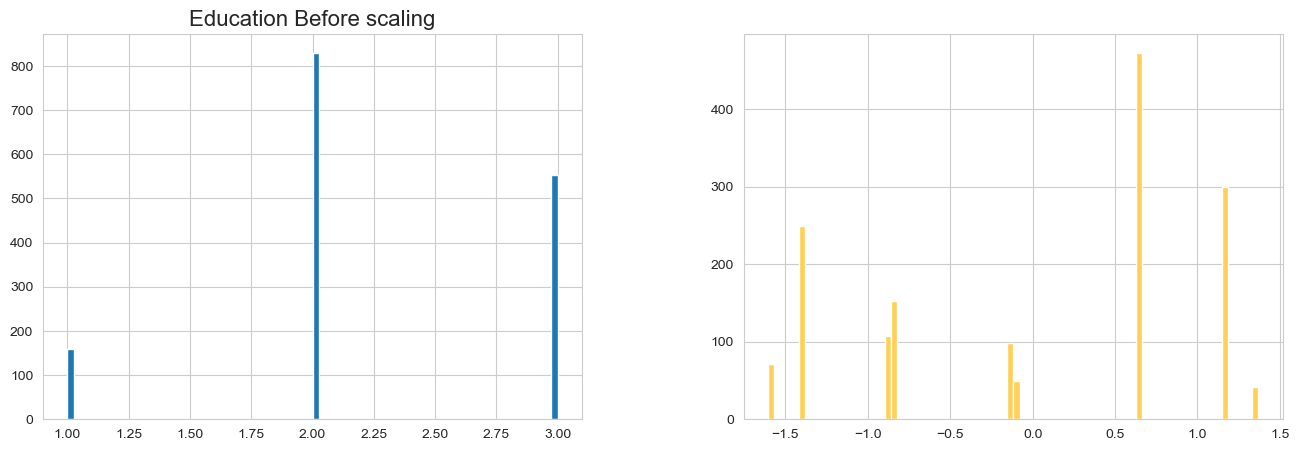

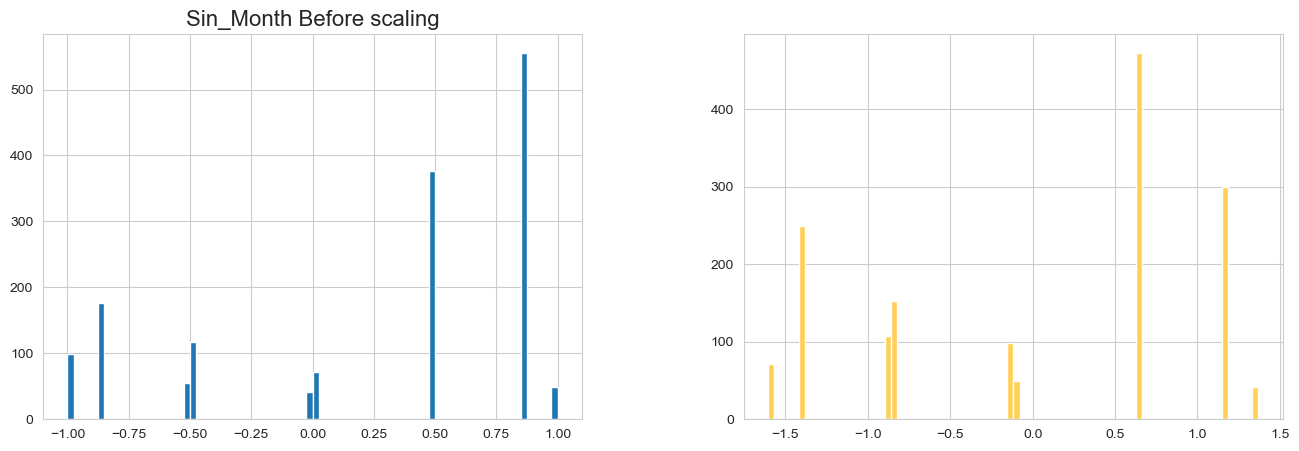

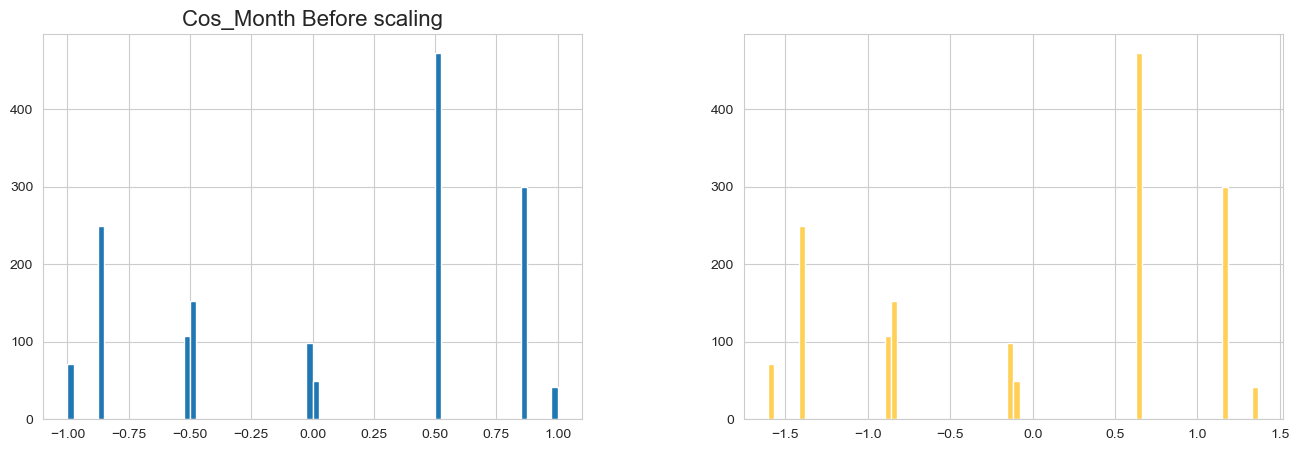

In [99]:
cols_no_ouliers = ['day',  'education' , 'sin_month' , 'cos_month']

for col_o in cols_no_ouliers: 

    # Create subplots to plot two plots per row
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (16,5))

    # histogram for distributions
    #axs[0].hist(df[ftr], bins=80, edgecolor='black')
    df.hist(column=[col_o],bins=80,ax=axs[0]) 
    axs[0].set_title(col_o.title() + ' Before scaling', fontsize=16)

    scaler = StandardScaler()
    df[[col_o]] = scaler.fit_transform(df[[col]])
    df[col_o].hist(bins=80, color='#FFCF56')


    

# E. Save the Prepared Dataset

Finally, let's save the prepared dataset as a CSV file.

In [100]:
df.to_csv('bank_train_prepared.csv')

In [101]:
# check df 
df

age  education  balance       day  duration  campaign  pdays  previous  \
0    -1.0  -0.859747     -1.0 -0.859747      -1.0      -1.0   -1.0      -1.0   
1    -1.0  -0.859747     -1.0 -0.859747      -1.0      -1.0   -1.0      -1.0   
2    -1.0  -0.859747     -1.0 -0.859747      -1.0      -1.0   -1.0      -1.0   
3    -1.0  -0.859747     -1.0 -0.859747      -1.0      -1.0   -1.0      -1.0   
4    -1.0  -0.859747     -1.0 -0.859747      -1.0      -1.0   -1.0      -1.0   
...   ...        ...      ...       ...       ...       ...    ...       ...   
1961 -0.5  -0.116348     -0.5 -0.116348      -0.5      -0.5   -0.5      -0.5   
1962 -0.5  -0.116348     -0.5 -0.116348      -0.5      -0.5   -0.5      -0.5   
1963 -0.5  -0.116348     -0.5 -0.116348      -0.5      -0.5   -0.5      -0.5   
1964 -0.5  -0.116348     -0.5 -0.116348      -0.5      -0.5   -0.5      -0.5   
1965 -0.5  -0.116348     -0.5 -0.116348      -0.5      -0.5   -0.5      -0.5   

      subscribed  sin_month  ...  marital_nan  housing_yes  housing_nan  \
0              0  -0.859747  ...            0            1            0   
1              0  -0.859747  ...            0            1            0   
2              0  -0.859747  ...            0            1            0   
3              0  -0.859747  ...            0            1            0   
4              0  -0.859747  ...            0            1            0   
...          ...        ...  ...          ...          ...          ...   
1961           1  -0.116348  ...            0            0            0   
1962           1  -0.116348  ...            0            0            0   
1963           1  -0.116348  ...            0            1            0   
1964           1  -0.116348  ...            0            0            0   
1965           1  -0.116348  ...            0            0            0   

      loan_yes  loan_nan  contact_telephone  contact_nan  poutcome_other  \
0            0         0                  0            0               0   
1            1         0                  0            0               0   
2            1         0                  0            0               0   
3            1         0                  0            0               0   
4            0         0                  0            0               0   
...        ...       ...                ...          ...             ...   
1961         0         0                  0            0               0   
1962         0         0                  0            0               0   
1963         0         0                  0            0               0   
1964         0         0                  0            0               0   
1965         0         0                  0            0               0   

      poutcome_success  poutcome_nan  
0                    0             0  
1                    0             0  
2                    0             0  
3                    0             0  
4                    0             0  
...                ...           ...  
1961                 1             0  
1962                 1             0  
1963                 1             0  
1964                 1             0  
1965                 1             0  

[1542 rows x 36 columns]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1542 entries, 0 to 1965
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1542 non-null   float64
 1   education          1542 non-null   float64
 2   balance            1542 non-null   float64
 3   day                1542 non-null   float64
 4   duration           1542 non-null   float64
 5   campaign           1542 non-null   float64
 6   pdays              1542 non-null   float64
 7   previous           1542 non-null   float64
 8   subscribed         1542 non-null   int64  
 9   sin_month          1542 non-null   float64
 10  cos_month          1542 non-null   float64
 11  default_yes        1542 non-null   uint8  
 12  default_nan        1542 non-null   uint8  
 13  job_blue-collar    1542 non-null   uint8  
 14  job_entrepreneur   1542 non-null   uint8  
 15  job_housemaid      1542 non-null   uint8  
 16  job_management     1542 

In [102]:
# p_table = pd.pivot_table(df, index=['Gender', 'Category'])                     
# print(p_table)value_counts()

In [ ]:
# p_table = pd.pivot_table(df_original, index=['loan','housing'],aggfunc='count')                    
# print(p_table)